# Time Series fundamentals

## Download bitcoin data

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2022-01-10 20:30:57--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.03s   

2022-01-10 20:30:58 (5.95 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [ ]:
import pandas as pd
df = pd.read_csv("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates=["Date"],
                 index_col="Date")
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [ ]:
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [ ]:
len(df)

2787

In [ ]:
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)":"Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


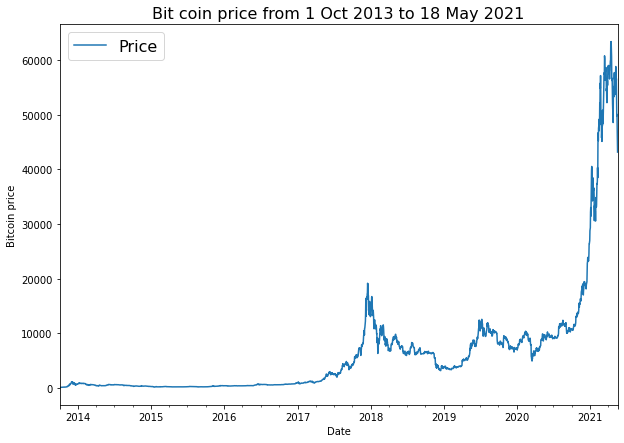

In [ ]:
import matplotlib.pyplot as plt

bitcoin_prices.plot(figsize=(10,7))
plt.ylabel("Bitcoin price")
plt.title("Bit coin price from 1 Oct 2013 to 18 May 2021",fontsize=16)
plt.legend(fontsize=16)


In [ ]:
import csv
from datetime import datetime
dates = []
prices = []
with open("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv") as f:
  reader = csv.DictReader(f)
  for row in reader:
    dates.append(datetime.strptime(row["Date"],"%Y-%m-%d"))
    # print(row["Closing Price (USD)"])
    prices.append(eval(row["Closing Price (USD)"]))

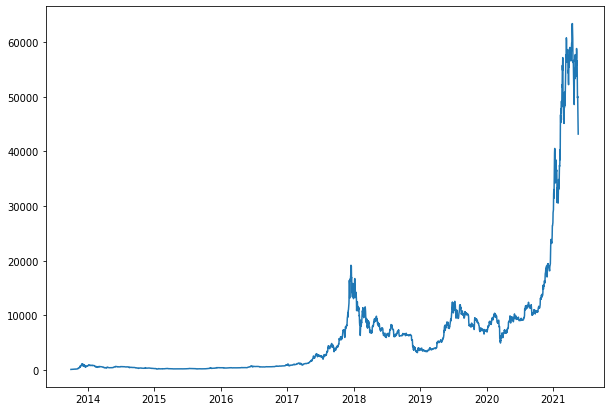

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(dates,prices)

## Train test spit part1(wrong way)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices.Price.to_numpy()
timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(timesteps,prices,test_size=0.2,random_state=42)
X_train.shape, X_test.shape, y_train.shape,y_test.shape

((2229,), (558,), (2229,), (558,))

## Create train and test sets

In [ ]:
split_size = int(0.8 * len(prices))
X_train, y_train = timesteps[:split_size], prices[:split_size]
X_test, y_test = timesteps[split_size:], prices[split_size:]
X_train.shape,X_test.shape

((2229,), (558,))

In [ ]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).
  
  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

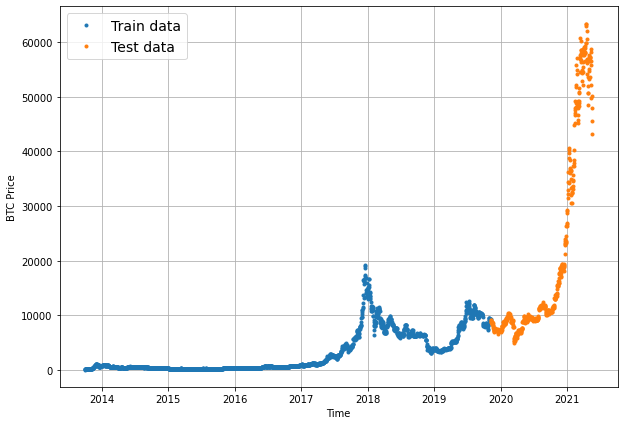

In [ ]:
# Try out our plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

## Build model 0, Naive forecast

The formula

$$\hat{y}_{t}  = y_{t-1}|

In [ ]:
# create naive forecast

naive_forecast = y_test[:-1]
naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

In [ ]:
y_test[-10:]

array([58788.20967893, 58102.19142623, 55715.54665129, 56573.5554719 ,
       52147.82118698, 49764.1320816 , 50032.69313676, 47885.62525472,
       45604.61575361, 43144.47129086])

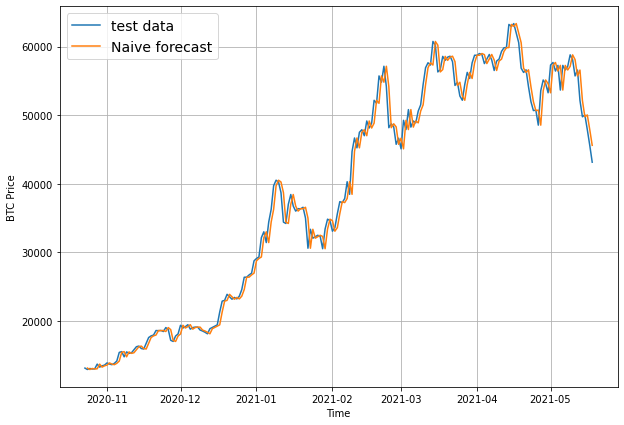

In [ ]:
plt.figure(figsize=(10,7))
plot_time_series(X_test,values=y_test,start=350,format="-",label="test data")
plot_time_series(X_test[1:],values=naive_forecast,start=350,format="-",label="Naive forecast")

In [ ]:
import tensorflow as tf

In [ ]:
# MASE 

def mean_absolute_scaled_error(y_true,y_pred):
  mea = tf.reduce_mean(tf.abs(y_true - y_pred))

  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))
  return mea/mae_naive_no_season

In [ ]:
mean_absolute_scaled_error(y_test[1:],naive_forecast).numpy()

0.9995699939182624

In [ ]:
def evaluate_preds(y_true,y_pred):
  y_true = tf.cast(y_true,dtype=tf.float32)
  y_pred = tf.cast(y_pred,dtype=tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true,y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true,y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true,y_pred)

  return {"mae":mae.numpy(),
          "mse":mse.numpy(),
          "rmse":rmse.numpy(),
          "mape":mape.numpy(),
          "mase":mase.numpy()}

## Evalute navive results

In [ ]:
naive_results = evaluate_preds(y_test[1:],naive_forecast)
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

## Format data part 2: Windowing our dataset

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
def get_labelled_windows(x,horizon):

  return x[:,:-horizon],x[:,-horizon:]


In [ ]:
test_window = test_label = get_labelled_windows(tf.expand_dims(tf.range(8),axis=0),HORIZON)
test_window,test_label

((<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[0, 1, 2, 3, 4, 5, 6]], dtype=int32)>,
  <tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[7]], dtype=int32)>),
 (<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[0, 1, 2, 3, 4, 5, 6]], dtype=int32)>,
  <tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[7]], dtype=int32)>))

In [ ]:
# Create function
import numpy as np
def make_windows(x,window_size,horizon):

  window_steps = np.expand_dims(np.arange(window_size+horizon),axis=0)
  window_indexes = window_steps + np.expand_dims(np.arange(len(x) - (window_size + horizon-1)),axis=1)

  windowed_array = x[window_indexes]
  windows,labels = get_labelled_windows(windowed_array,horizon)
  return windows,labels


In [ ]:
full_windows,full_labels = make_windows(x=prices,window_size=WINDOW_SIZE,horizon=HORIZON)
len(full_windows),full_labels.shape

(2780, (2780, 1))

In [ ]:
np.expand_dims(np.arange(8),axis=0)

array([[0, 1, 2, 3, 4, 5, 6, 7]])

In [ ]:
for i in range(3):
  print(f"Window:{full_windows[i]} -> Label: {full_labels[i]}")

Window:[123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window:[125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window:[108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


In [ ]:
# Make train test split

def make_train_test_splits(windows,labels,test_split=0.2):

  split_size = int(len(windows) * (1 - test_split)) 
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]

  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  
  return train_windows, test_windows, train_labels, test_labels

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows,full_labels)

In [ ]:
len(train_windows), len(test_windows), len(train_labels), test_labels.shape

(2224, 556, 2224, (556, 1))

In [ ]:
# make model checkpoint callback
import os
def create_model_checkpoint(model_name,save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path,model_name),
                                            verbose=0,
                                            save_best_only=True)

In [ ]:
### Model 1:Dense (window = 7, horizon = 1)
import tensorflow as tf
from tensorflow.keras import layers
tf.random.set_seed(42)


model_1 = tf.keras.Sequential([
    layers.Dense(128,activation="relu"),
    layers.Dense(HORIZON,activation="linear")
],name="model_1_dense")

model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae","mse"])
model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_1.name)])

Epoch 1/100
18/18 [==============================] - 2s 53ms/step - loss: 780.3455 - mae: 780.3455 - mse: 2312725.7500 - val_loss: 2279.6528 - val_mae: 2279.6528 - val_mse: 12772731.0000
Epoch 2/100
18/18 [==============================] - 0s 28ms/step - loss: 247.6756 - mae: 247.6756 - mse: 285481.1875 - val_loss: 1005.9992 - val_mae: 1005.9992 - val_mse: 3441833.5000
Epoch 3/100
18/18 [==============================] - 0s 29ms/step - loss: 188.4116 - mae: 188.4116 - mse: 171891.5938 - val_loss: 923.2863 - val_mae: 923.2863 - val_mse: 2868221.2500
Epoch 4/100
18/18 [==============================] - 0s 29ms/step - loss: 169.4340 - mae: 169.4340 - mse: 151700.5625 - val_loss: 900.5872 - val_mae: 900.5872 - val_mse: 2683715.7500
Epoch 5/100
18/18 [==============================] - 0s 28ms/step - loss: 165.0895 - mae: 165.0895 - mse: 145490.8125 - val_loss: 895.2236 - val_mae: 895.2236 - val_mse: 2564574.5000
Epoch 6/100
18/18 [==============================] - 0s 29ms/step - loss: 158.5

In [ ]:
model_1.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 585.9752 - mae: 585.9752 - mse: 1197801.2500


[585.9752197265625, 585.9752197265625, 1197801.25]

In [ ]:
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

In [ ]:
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense/")

In [ ]:
def make_preds(model,input_data):
  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

In [ ]:
model_1_preds = make_preds(model_1,test_windows)
len(model_1_preds), model_1_preds.shape

(556, TensorShape([556]))

In [ ]:
model_1_results = evaluate_preds(tf.squeeze(test_labels),model_1_preds)
model_1_results

{'mae': 568.95105,
 'mape': 2.5448983,
 'mase': 0.9994894,
 'mse': 1171743.9,
 'rmse': 1082.4712}

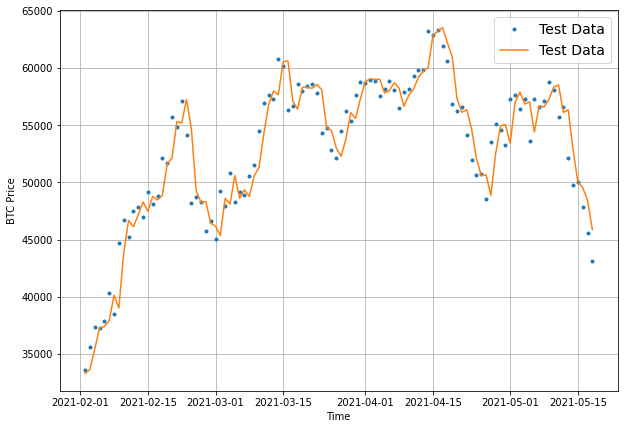

In [ ]:
offset = 450
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):],values=test_labels,start=offset,label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):],values=model_1_preds,format="-",start=offset,label="Test Data")

In [ ]:
HORIZON = 1
WINDOW_SIZE = 30

In [ ]:
full_windows, full_labels = make_windows(x=prices,window_size=WINDOW_SIZE,horizon=HORIZON)

In [ ]:
full_windows.shape,full_labels.shape

((2757, 30), (2757, 1))

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows,full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [ ]:
 #Create model 2

 tf.random.set_seed(42)

 model_2 = tf.keras.Sequential([
    layers.Dense(128,activation="relu"),
    layers.Dense(HORIZON)
 ],name="model_2_dense")

 model_2.compile(loss="mae",
               optimizer="Adam",
               metrics=["mae","mse"])
 
 model_2.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_2.name)])

Epoch 1/100
18/18 [==============================] - 1s 36ms/step - loss: 1097.0399 - mae: 1097.0399 - mse: 4741505.5000 - val_loss: 3900.2532 - val_mae: 3900.2532 - val_mse: 32752722.0000
Epoch 2/100
18/18 [==============================] - 0s 29ms/step - loss: 428.0732 - mae: 428.0732 - mse: 811548.3125 - val_loss: 1587.0746 - val_mae: 1587.0746 - val_mse: 6817662.0000
Epoch 3/100
18/18 [==============================] - 0s 28ms/step - loss: 279.7655 - mae: 279.7655 - mse: 363083.1250 - val_loss: 1220.6891 - val_mae: 1220.6891 - val_mse: 4447004.5000
Epoch 4/100
18/18 [==============================] - 0s 29ms/step - loss: 224.3637 - mae: 224.3637 - mse: 225072.2656 - val_loss: 1160.1572 - val_mae: 1160.1572 - val_mse: 3837505.5000
Epoch 5/100
18/18 [==============================] - 0s 29ms/step - loss: 187.9681 - mae: 187.9681 - mse: 173777.0469 - val_loss: 1007.6486 - val_mae: 1007.6486 - val_mse: 3224228.7500
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss

In [ ]:
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 608.9620 - mae: 608.9620 - mse: 1281440.6250


[608.9619750976562, 608.9619750976562, 1281440.625]

In [ ]:
model_2_preds = make_preds(model_2,input_data=test_windows)

In [ ]:
model_2_preds.shape,test_labels.shape

(TensorShape([552]), (552, 1))

In [ ]:
model_2_results = evaluate_preds(tf.squeeze(test_labels),model_2_preds)
model_2_results

{'mae': 608.962,
 'mape': 2.769341,
 'mase': 1.0644715,
 'mse': 1281440.6,
 'rmse': 1132.0073}

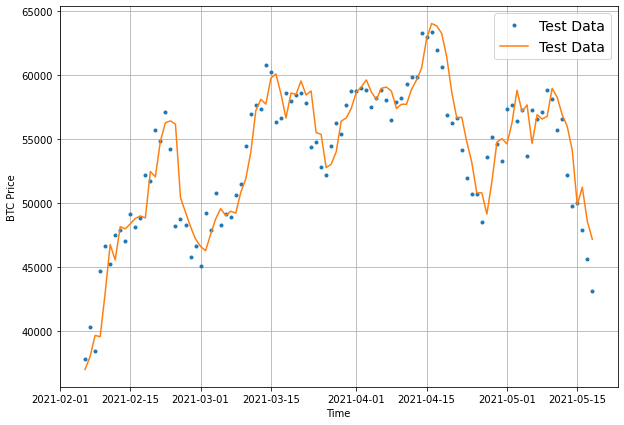

In [ ]:
offset = 450
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):],values=test_labels,start=offset,label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):],values=model_2_preds,format="-",start=offset,label="Test Data")

In [ ]:
# model 3: make prediction with horizon of 7

HORIZON = 7
WINDOW_SIZE = 30

In [ ]:
full_windows, full_labels = make_windows(prices,window_size=WINDOW_SIZE,horizon=HORIZON)
print(full_labels.shape)
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows,full_labels)
len(train_windows), len(test_windows), train_labels.shape, test_labels.shape

(2751, 7)


(2200, 551, (2200, 7), (551, 7))

In [ ]:
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
    layers.Dense(128,activation="relu"),
    layers.Dense(HORIZON)
],name="model_3_dense")

model_3.compile(loss="MAE",
                optimizer="Adam")

model_3.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=0,
            validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_3.name)],
            batch_size=128)

INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: mod

In [ ]:
model_3.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1340.4274


1340.4273681640625

In [ ]:
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense/")

In [ ]:
model_3.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1234.8838


1234.8837890625

In [ ]:
def evaluate_preds(y_true,y_pred):
  y_true = tf.cast(y_true,dtype=tf.float32)
  y_pred = tf.cast(y_pred,dtype=tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true,y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true,y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true,y_pred)

  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae":mae.numpy(),
          "mse":mse.numpy(),
          "rmse":rmse.numpy(),
          "mape":mape.numpy(),
          "mase":mase.numpy()}

In [ ]:
model_3_preds = model_3.predict(test_windows)
model_3_results = evaluate_preds(tf.squeeze(test_labels),model_3_preds)
model_3_results

{'mae': 1234.8838,
 'mape': 5.4874988,
 'mase': 2.1974063,
 'mse': 5393734.0,
 'rmse': 1419.1362}

# Visualize, visualize, visualize

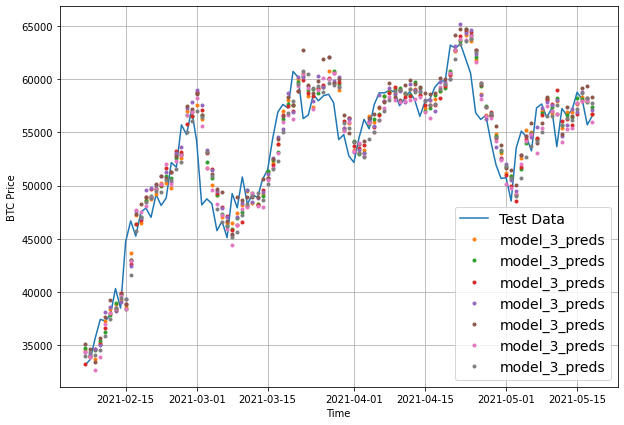

In [ ]:
offset = 450
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):],values=test_labels[:,0],format="-",start=offset,label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):],values=model_3_preds,start=offset,label="model_3_preds")

# Compre models

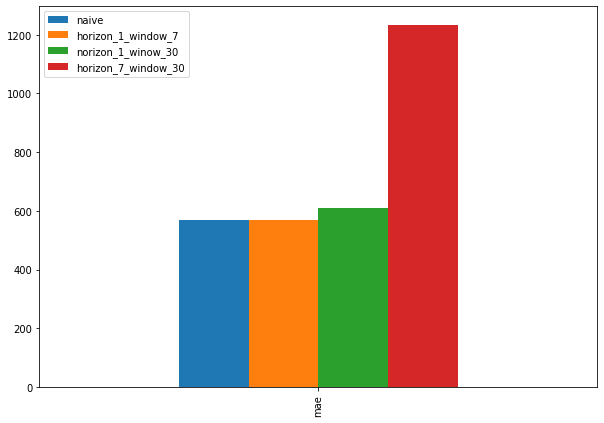

In [ ]:
pd.DataFrame({"naive":naive_results["mae"],
              "horizon_1_window_7":model_1_results["mae"],
              "norizon_1_winow_30":model_2_results["mae"],
              "horizon_7_window_30":model_3_results["mae"]},index=["mae"]).plot(figsize=(10,7),kind="bar")

In [ ]:
# model 3 

HORIZON = 1
WINDOW_SIZE = 7

# create windowed data

full_windows, full_labels = make_windows(prices,window_size=WINDOW_SIZE,horizon=HORIZON)
print(full_labels.shape)
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows,full_labels)
len(train_windows), len(test_windows), train_labels.shape, test_labels.shape

(2780, 1)


(2224, 556, (2224, 1), (556, 1))

In [ ]:
tf.random.set_seed(42)
model_4 = tf.keras.Sequential([
    layers.Input(shape=(WINDOW_SIZE,)),
    layers.Lambda(lambda x: tf.expand_dims(x,axis=1)),
    layers.Conv1D(128,5,activation="relu",padding="causal"),
    layers.GlobalAveragePooling1D(),
    layers.Dense(HORIZON)
],name="model_4_conv1d")

model_4.compile(loss="mae",
                optimizer="Adam")

In [ ]:
model_4.summary()

Model: "model_4_conv1d"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense_6 (Dense)             (None, 1)                 129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_4.fit(x=train_windows,
            y=train_labels,
            batch_size=128,
            epochs=100,
            validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_4.name)])

Epoch 1/100
18/18 [==============================] - 7s 42ms/step - loss: 1207.3817 - val_loss: 2320.6216
Epoch 2/100
18/18 [==============================] - 1s 35ms/step - loss: 316.2172 - val_loss: 1467.2802
Epoch 3/100
18/18 [==============================] - 1s 36ms/step - loss: 192.6853 - val_loss: 1164.7075
Epoch 4/100
18/18 [==============================] - 1s 35ms/step - loss: 177.3535 - val_loss: 981.6695
Epoch 5/100
18/18 [==============================] - 1s 50ms/step - loss: 172.3466 - val_loss: 960.8710
Epoch 6/100
18/18 [==============================] - 1s 36ms/step - loss: 171.9754 - val_loss: 950.2026
Epoch 7/100
18/18 [==============================] - 1s 36ms/step - loss: 167.1943 - val_loss: 943.2872
Epoch 8/100
18/18 [==============================] - 1s 37ms/step - loss: 163.5991 - val_loss: 905.5262
Epoch 9/100
18/18 [==============================] - 0s 4ms/step - loss: 162.5455 - val_loss: 929.7608
Epoch 10/100
18/18 [==============================] - 1s 37ms

In [ ]:
model_4.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 8ms/step - loss: 610.1539


610.1538696289062

In [ ]:
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1d")

In [ ]:
model_4.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 570.8283


570.8283081054688

In [ ]:
model_4_preds = make_preds(model_4,test_windows)
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8851.465, 8754.471, 8983.927, 8759.671, 8703.627, 8708.294,
       8661.668, 8494.839, 8435.316, 8492.115], dtype=float32)>

In [ ]:
model_4_results = evaluate_preds(tf.squeeze(test_labels), model_4_preds)
model_4_results

{'mae': 570.82837,
 'mape': 2.5593352,
 'mase': 1.0027874,
 'mse': 1176671.0,
 'rmse': 1084.7446}

## Model 5: RNN(LSTM)

In [ ]:
tf.random.set_seed(42)

# Functional api

inputs = layers.Input(shape=(WINDOW_SIZE,))
x = layers.Lambda(lambda x: tf.expand_dims(x,axis=2))(inputs)
x = layers.LSTM(128,activation="relu")(x)
x = layers.Dense(64,activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs,output,name="model_5_LSTM")


model_5.compile(loss="mae",
            optimizer="Adam")

In [ ]:
model_5.summary()

Model: "model_5_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 7)]               0         
                                                                 
 lambda_1 (Lambda)           (None, 7, 1)              0         
                                                                 
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 74,881
Trainable params: 74,881
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_5.fit(x=train_windows,
            y=train_labels,
            batch_size=128,
            epochs=100,
            validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_5.name)])

Epoch 1/100
18/18 [==============================] - ETA: 0s - loss: 2315.6919INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 125ms/step - loss: 2315.6919 - val_loss: 7846.4297
Epoch 2/100
18/18 [==============================] - ETA: 0s - loss: 418.0832INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 128ms/step - loss: 418.0832 - val_loss: 1250.6134
Epoch 3/100
18/18 [==============================] - ETA: 0s - loss: 181.8344INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 117ms/step - loss: 181.8344 - val_loss: 865.2700
Epoch 4/100
18/18 [==============================] - 0s 15ms/step - loss: 188.8861 - val_loss: 1069.9817
Epoch 5/100
18/18 [==============================] - 0s 16ms/step - loss: 208.2102 - val_loss: 985.9565
Epoch 6/100
18/18 [==============================] - 0s 15ms/step - loss: 198.8663 - val_loss: 1212.2064
Epoch 7/100
18/18 [==============================] - 0s 15ms/step - loss: 203.2402 - val_loss: 1069.7886
Epoch 8/100
18/18 [==============================] - 0s 15ms/step - loss: 202.8491 - val_loss: 1062.6178
Epoch 9/100
14/18 [======================>.......] - ETA: 0s - loss: 160.7306INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 120ms/step - loss: 162.5433 - val_loss: 797.4378
Epoch 10/100
18/18 [==============================] - 0s 15ms/step - loss: 226.6599 - val_loss: 1146.1302
Epoch 11/100
18/18 [==============================] - 0s 14ms/step - loss: 199.6290 - val_loss: 1073.2909
Epoch 12/100
18/18 [==============================] - 0s 15ms/step - loss: 173.1276 - val_loss: 1252.0436
Epoch 13/100
18/18 [==============================] - 0s 16ms/step - loss: 154.8961 - val_loss: 1813.8442
Epoch 14/100
18/18 [==============================] - 0s 15ms/step - loss: 285.2869 - val_loss: 1450.5945
Epoch 15/100
18/18 [==============================] - 0s 14ms/step - loss: 184.5476 - val_loss: 932.9149
Epoch 16/100
18/18 [==============================] - 0s 15ms/step - loss: 160.3704 - val_loss: 913.7829
Epoch 17/100
18/18 [==============================] - 0s 15ms/step - loss: 173.6373 - val_loss: 972.0792
Epoch 18/100
18/18 [==============================] - 0s 14ms/

INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 132ms/step - loss: 146.5729 - val_loss: 757.3660
Epoch 25/100
18/18 [==============================] - 0s 14ms/step - loss: 155.4274 - val_loss: 835.6190
Epoch 26/100
18/18 [==============================] - 0s 14ms/step - loss: 162.0865 - val_loss: 965.4318
Epoch 27/100
18/18 [==============================] - 0s 15ms/step - loss: 155.1678 - val_loss: 936.0312
Epoch 28/100
18/18 [==============================] - 0s 15ms/step - loss: 157.3130 - val_loss: 812.1965
Epoch 29/100
18/18 [==============================] - 0s 16ms/step - loss: 143.6980 - val_loss: 863.6088
Epoch 30/100
18/18 [==============================] - 0s 15ms/step - loss: 150.8362 - val_loss: 965.1169
Epoch 31/100
18/18 [==============================] - 0s 14ms/step - loss: 151.8530 - val_loss: 910.5930
Epoch 32/100
18/18 [==============================] - 0s 16ms/step - loss: 147.4473 - val_loss: 810.7222
Epoch 33/100
18/18 [==============================] - 0s 15ms/step 

INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 119ms/step - loss: 137.1917 - val_loss: 737.3272
Epoch 38/100
18/18 [==============================] - ETA: 0s - loss: 135.7287INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 115ms/step - loss: 135.7287 - val_loss: 717.3290
Epoch 39/100
18/18 [==============================] - 0s 16ms/step - loss: 131.7596 - val_loss: 722.8550
Epoch 40/100
17/18 [===========================>..] - ETA: 0s - loss: 135.4931INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 115ms/step - loss: 135.1246 - val_loss: 710.9908
Epoch 41/100
18/18 [==============================] - 0s 17ms/step - loss: 137.8834 - val_loss: 786.6625
Epoch 42/100
18/18 [==============================] - ETA: 0s - loss: 136.1387INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 135ms/step - loss: 136.1387 - val_loss: 701.6060
Epoch 43/100
14/18 [======================>.......] - ETA: 0s - loss: 122.6372INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 116ms/step - loss: 125.0192 - val_loss: 682.4579
Epoch 44/100
18/18 [==============================] - ETA: 0s - loss: 124.9748INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 115ms/step - loss: 124.9748 - val_loss: 681.2891
Epoch 45/100
16/18 [=========================>....] - ETA: 0s - loss: 120.4245INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 133ms/step - loss: 122.5610 - val_loss: 667.8552
Epoch 46/100
18/18 [==============================] - 0s 15ms/step - loss: 127.0369 - val_loss: 696.6919
Epoch 47/100
18/18 [==============================] - 0s 14ms/step - loss: 131.6515 - val_loss: 916.9187
Epoch 48/100
18/18 [==============================] - 0s 15ms/step - loss: 126.1561 - val_loss: 726.5524
Epoch 49/100
18/18 [==============================] - 0s 14ms/step - loss: 125.2766 - val_loss: 680.6521
Epoch 50/100
18/18 [==============================] - ETA: 0s - loss: 126.6587INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 116ms/step - loss: 126.6587 - val_loss: 644.3533
Epoch 51/100
18/18 [==============================] - 0s 15ms/step - loss: 119.9587 - val_loss: 681.0396
Epoch 52/100
15/18 [========================>.....] - ETA: 0s - loss: 124.3242INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 118ms/step - loss: 119.9704 - val_loss: 639.7823
Epoch 53/100
18/18 [==============================] - 0s 15ms/step - loss: 123.9820 - val_loss: 728.0184
Epoch 54/100
17/18 [===========================>..] - ETA: 0s - loss: 120.4241INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 118ms/step - loss: 120.7491 - val_loss: 627.3360
Epoch 55/100
18/18 [==============================] - 0s 15ms/step - loss: 125.3779 - val_loss: 637.1116
Epoch 56/100
18/18 [==============================] - 0s 15ms/step - loss: 121.6262 - val_loss: 896.4355
Epoch 57/100
18/18 [==============================] - 0s 15ms/step - loss: 144.5725 - val_loss: 785.3615
Epoch 58/100
18/18 [==============================] - 0s 14ms/step - loss: 128.6984 - val_loss: 677.9114
Epoch 59/100
18/18 [==============================] - 0s 15ms/step - loss: 123.4101 - val_loss: 631.4971
Epoch 60/100
18/18 [==============================] - 0s 25ms/step - loss: 118.8315 - val_loss: 651.2737
Epoch 61/100
15/18 [========================>.....] - ETA: 0s - loss: 119.1068INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 138ms/step - loss: 118.2702 - val_loss: 617.8834
Epoch 62/100
18/18 [==============================] - 0s 16ms/step - loss: 117.5680 - val_loss: 627.6703
Epoch 63/100
18/18 [==============================] - 0s 16ms/step - loss: 123.7325 - val_loss: 668.5863
Epoch 64/100
18/18 [==============================] - 0s 16ms/step - loss: 117.2187 - val_loss: 630.8098
Epoch 65/100
18/18 [==============================] - 0s 16ms/step - loss: 119.7080 - val_loss: 637.2162
Epoch 66/100
18/18 [==============================] - 0s 16ms/step - loss: 116.8407 - val_loss: 628.3157
Epoch 67/100
18/18 [==============================] - 0s 15ms/step - loss: 116.7900 - val_loss: 782.5441
Epoch 68/100
18/18 [==============================] - 0s 15ms/step - loss: 120.7406 - val_loss: 685.2661
Epoch 69/100
18/18 [==============================] - 0s 15ms/step - loss: 131.5827 - val_loss: 634.5744
Epoch 70/100
15/18 [========================>.....] - ETA: 0s - los

INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 114ms/step - loss: 139.6164 - val_loss: 615.5542
Epoch 71/100
18/18 [==============================] - 0s 15ms/step - loss: 121.4152 - val_loss: 692.0713
Epoch 72/100
18/18 [==============================] - 0s 16ms/step - loss: 115.6948 - val_loss: 627.0291
Epoch 73/100
18/18 [==============================] - 0s 15ms/step - loss: 114.7107 - val_loss: 660.5246
Epoch 74/100
18/18 [==============================] - 0s 14ms/step - loss: 112.8127 - val_loss: 623.2579
Epoch 75/100
18/18 [==============================] - 0s 16ms/step - loss: 114.6544 - val_loss: 625.7601
Epoch 76/100
18/18 [==============================] - ETA: 0s - loss: 113.8582INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 119ms/step - loss: 113.8582 - val_loss: 597.3412
Epoch 77/100
15/18 [========================>.....] - ETA: 0s - loss: 115.8650INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 137ms/step - loss: 112.6721 - val_loss: 590.5945
Epoch 78/100
18/18 [==============================] - ETA: 0s - loss: 110.9476INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 122ms/step - loss: 110.9476 - val_loss: 589.7923
Epoch 79/100
18/18 [==============================] - 0s 16ms/step - loss: 110.3862 - val_loss: 609.3285
Epoch 80/100
18/18 [==============================] - 0s 15ms/step - loss: 112.2488 - val_loss: 597.8243
Epoch 81/100
18/18 [==============================] - ETA: 0s - loss: 110.1186INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 118ms/step - loss: 110.1186 - val_loss: 585.2986
Epoch 82/100
17/18 [===========================>..] - ETA: 0s - loss: 117.5220INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 139ms/step - loss: 118.7184 - val_loss: 584.6694
Epoch 83/100
18/18 [==============================] - 0s 15ms/step - loss: 113.7743 - val_loss: 716.4075
Epoch 84/100
18/18 [==============================] - 0s 16ms/step - loss: 115.7927 - val_loss: 613.3188
Epoch 85/100
18/18 [==============================] - 0s 16ms/step - loss: 110.8674 - val_loss: 632.8896
Epoch 86/100
18/18 [==============================] - 0s 14ms/step - loss: 112.0093 - val_loss: 614.5219
Epoch 87/100
18/18 [==============================] - 0s 15ms/step - loss: 109.2802 - val_loss: 600.6341
Epoch 88/100
17/18 [===========================>..] - ETA: 0s - loss: 108.4533INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 128ms/step - loss: 108.4093 - val_loss: 583.8384
Epoch 89/100
16/18 [=========================>....] - ETA: 0s - loss: 104.9094INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 122ms/step - loss: 109.3124 - val_loss: 577.7901
Epoch 90/100
18/18 [==============================] - 0s 16ms/step - loss: 108.6505 - val_loss: 624.0450
Epoch 91/100
18/18 [==============================] - 0s 16ms/step - loss: 113.8658 - val_loss: 607.8619
Epoch 92/100
18/18 [==============================] - 0s 16ms/step - loss: 112.5723 - val_loss: 578.5651
Epoch 93/100
18/18 [==============================] - 0s 15ms/step - loss: 116.3248 - val_loss: 626.3384
Epoch 94/100
18/18 [==============================] - 0s 15ms/step - loss: 111.3453 - val_loss: 588.9597
Epoch 95/100
18/18 [==============================] - 0s 15ms/step - loss: 108.5997 - val_loss: 578.4591
Epoch 96/100
18/18 [==============================] - 0s 17ms/step - loss: 116.5246 - val_loss: 637.6414
Epoch 97/100
18/18 [==============================] - 0s 16ms/step - loss: 109.6545 - val_loss: 581.0408
Epoch 98/100
18/18 [==============================] - 0s 15ms/step 

INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 123ms/step - loss: 107.8567 - val_loss: 575.9613
Epoch 100/100
18/18 [==============================] - 0s 17ms/step - loss: 112.0021 - val_loss: 696.8379


In [ ]:
model_5 = tf.keras.models.load_model("model_experiments/model_5_LSTM")
model_5.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 575.9613


575.9613037109375

In [ ]:
model_5_preds = make_preds(model_5,test_windows)
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8869.312, 8769.478, 8985.716, 8754.8  , 8714.523, 8729.054,
       8657.15 , 8504.837, 8448.863, 8497.003], dtype=float32)>

In [ ]:
model_5_results = evaluate_preds(tf.squeeze(test_labels),model_5_preds)
model_5_results

{'mae': 575.9613,
 'mape': 2.5822618,
 'mase': 1.0118045,
 'mse': 1190903.8,
 'rmse': 1091.2854}

In [ ]:
!nvidia-smi

Mon Jan 10 20:34:24 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.46       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    32W / 250W |    705MiB / 16280MiB |      5%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## add multivariatee data

In [ ]:
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
block_reward_1 = 50
block_reward_2 = 25
block_reward_3 = 12.5
block_reward_4 = 6.25

#block _reward 10

block_reward_2_datatime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

In [ ]:
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days 
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days 
block_reward_2_days, block_reward_3_days

(1012, 2421)

In [ ]:
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None


bitcoin_prices_block.iloc[:block_reward_2_days,-1] = block_reward_2 
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days,-1] =  block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:,-1] =  block_reward_4

In [ ]:
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


In [ ]:
bitcoin_prices_block.tail()

,Price,block_reward
Date,,
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25
2021-05-17,45604.615754,6.25
2021-05-18,43144.471291,6.25


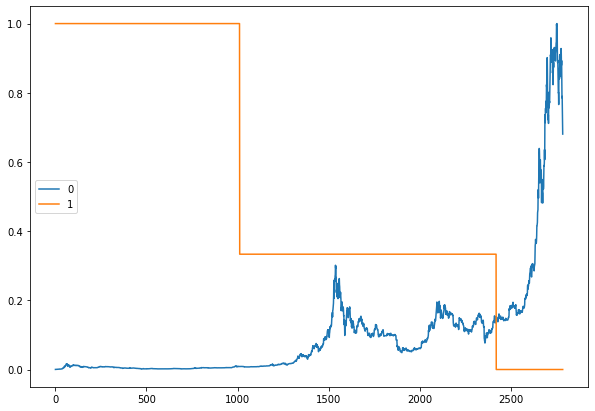

In [ ]:
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price","block_reward"]]))
scaled_price_block_df.plot(figsize=(10,7))

# Making a windowed dataset with pandas

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
bitcoin_prices_windowed = bitcoin_prices_block.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_windowed[f"price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)

In [ ]:
bitcoin_prices_windowed.head(10)

,Price,block_reward,price+1,price+2,price+3,price+4,price+5,price+6,price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [ ]:
X = bitcoin_prices_windowed.dropna().drop("Price",axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)

In [ ]:
X.head()

,block_reward,price+1,price+2,price+3,price+4,price+5,price+6,price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [ ]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [ ]:
split_size = int(len(X) * 0.8)

X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train),len(y_train),len(X_test),len(y_test)

(2224, 2224, 556, 556)

In [ ]:
tf.random.set_seed(42)
model_6 = tf.keras.Sequential([
   layers.Input(shape=(WINDOW_SIZE +1,)),
   layers.Dense(128,activation="relu"),
   layers.Dense(64,activation="relu"),
   layers.Dense(HORIZON)
],name="model_6_dense")

model_6.compile(loss="mae",
                optimizer="Adam")

In [ ]:
model_6.summary()

Model: "model_6_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               1152      
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 9,473
Trainable params: 9,473
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_6.fit(x=X_train,
            y=y_train,
            epochs=100,
            batch_size=128,
            validation_data=(X_test,y_test),
            callbacks=[create_model_checkpoint(model_6.name)])

Epoch 1/100
 1/18 [>.............................] - ETA: 5s - loss: 4475.6758INFO:tensorflow:Assets written to: model_experiments/model_6_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense/assets


18/18 [==============================] - 1s 41ms/step - loss: 2079.9954 - val_loss: 1938.4285
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 316.6836INFO:tensorflow:Assets written to: model_experiments/model_6_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense/assets


18/18 [==============================] - 1s 35ms/step - loss: 413.2998 - val_loss: 1856.3627
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 249.0104INFO:tensorflow:Assets written to: model_experiments/model_6_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense/assets


18/18 [==============================] - 1s 35ms/step - loss: 222.7558 - val_loss: 1327.1110
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 257.3140INFO:tensorflow:Assets written to: model_experiments/model_6_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense/assets


18/18 [==============================] - 1s 33ms/step - loss: 192.0770 - val_loss: 1037.4915
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 180.4342INFO:tensorflow:Assets written to: model_experiments/model_6_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense/assets


18/18 [==============================] - 1s 33ms/step - loss: 180.9112 - val_loss: 995.9293
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 130.5195INFO:tensorflow:Assets written to: model_experiments/model_6_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense/assets


18/18 [==============================] - 1s 33ms/step - loss: 173.0443 - val_loss: 931.7136
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 201.5401INFO:tensorflow:Assets written to: model_experiments/model_6_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense/assets


18/18 [==============================] - 1s 33ms/step - loss: 160.4259 - val_loss: 886.8236
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 125.7659INFO:tensorflow:Assets written to: model_experiments/model_6_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense/assets


18/18 [==============================] - 1s 32ms/step - loss: 151.6769 - val_loss: 822.2672
Epoch 9/100
 1/18 [>.............................] - ETA: 0s - loss: 125.4670INFO:tensorflow:Assets written to: model_experiments/model_6_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense/assets


18/18 [==============================] - 1s 33ms/step - loss: 149.5921 - val_loss: 779.9330
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 144.0143INFO:tensorflow:Assets written to: model_experiments/model_6_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense/assets


18/18 [==============================] - 1s 46ms/step - loss: 137.4854 - val_loss: 769.6066
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 144.7347INFO:tensorflow:Assets written to: model_experiments/model_6_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense/assets


18/18 [==============================] - 1s 33ms/step - loss: 131.8702 - val_loss: 735.6387
Epoch 12/100
18/18 [==============================] - 0s 4ms/step - loss: 130.7595 - val_loss: 804.4272
Epoch 13/100
 1/18 [>.............................] - ETA: 0s - loss: 141.1810INFO:tensorflow:Assets written to: model_experiments/model_6_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense/assets


18/18 [==============================] - 1s 32ms/step - loss: 142.3675 - val_loss: 720.3209
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 116.6057INFO:tensorflow:Assets written to: model_experiments/model_6_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense/assets


18/18 [==============================] - 1s 32ms/step - loss: 128.6277 - val_loss: 651.8815
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 116.6470INFO:tensorflow:Assets written to: model_experiments/model_6_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense/assets


18/18 [==============================] - 1s 33ms/step - loss: 122.7230 - val_loss: 650.4578
Epoch 16/100
18/18 [==============================] - 0s 3ms/step - loss: 125.1527 - val_loss: 689.3228
Epoch 17/100
 1/18 [>.............................] - ETA: 0s - loss: 106.8708INFO:tensorflow:Assets written to: model_experiments/model_6_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense/assets


18/18 [==============================] - 1s 32ms/step - loss: 118.3934 - val_loss: 631.1407
Epoch 18/100
 1/18 [>.............................] - ETA: 0s - loss: 126.3900INFO:tensorflow:Assets written to: model_experiments/model_6_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense/assets


18/18 [==============================] - 1s 34ms/step - loss: 117.4119 - val_loss: 618.2429
Epoch 19/100
18/18 [==============================] - 0s 4ms/step - loss: 116.5400 - val_loss: 704.2460
Epoch 20/100
18/18 [==============================] - 0s 4ms/step - loss: 119.4998 - val_loss: 673.2575
Epoch 21/100
18/18 [==============================] - 0s 4ms/step - loss: 120.4439 - val_loss: 619.4382
Epoch 22/100
18/18 [==============================] - 0s 3ms/step - loss: 119.7412 - val_loss: 679.2919
Epoch 23/100
18/18 [==============================] - 0s 4ms/step - loss: 115.7253 - val_loss: 627.2435
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 127.1982INFO:tensorflow:Assets written to: model_experiments/model_6_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense/assets


18/18 [==============================] - 1s 32ms/step - loss: 112.7091 - val_loss: 598.3615
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 126.6852INFO:tensorflow:Assets written to: model_experiments/model_6_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense/assets


18/18 [==============================] - 1s 32ms/step - loss: 110.8481 - val_loss: 593.3990
Epoch 26/100
18/18 [==============================] - 0s 4ms/step - loss: 111.7814 - val_loss: 623.6434
Epoch 27/100
18/18 [==============================] - 0s 3ms/step - loss: 118.3458 - val_loss: 702.5554
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 113.0217INFO:tensorflow:Assets written to: model_experiments/model_6_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense/assets


18/18 [==============================] - 1s 33ms/step - loss: 114.9041 - val_loss: 579.5916
Epoch 29/100
18/18 [==============================] - 0s 4ms/step - loss: 109.0435 - val_loss: 621.2326
Epoch 30/100
18/18 [==============================] - 0s 3ms/step - loss: 120.6158 - val_loss: 596.6077
Epoch 31/100
18/18 [==============================] - 0s 4ms/step - loss: 109.0803 - val_loss: 638.3177
Epoch 32/100
18/18 [==============================] - 0s 3ms/step - loss: 110.9091 - val_loss: 601.0845
Epoch 33/100
18/18 [==============================] - 0s 3ms/step - loss: 109.0897 - val_loss: 584.9045
Epoch 34/100
18/18 [==============================] - 0s 4ms/step - loss: 108.3116 - val_loss: 622.9828
Epoch 35/100
18/18 [==============================] - 0s 4ms/step - loss: 107.0909 - val_loss: 599.9532
Epoch 36/100
 1/18 [>.............................] - ETA: 0s - loss: 153.3355INFO:tensorflow:Assets written to: model_experiments/model_6_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense/assets


18/18 [==============================] - 1s 33ms/step - loss: 109.3746 - val_loss: 574.5517
Epoch 37/100
18/18 [==============================] - 0s 4ms/step - loss: 109.4986 - val_loss: 576.1976
Epoch 38/100
18/18 [==============================] - 0s 4ms/step - loss: 111.5860 - val_loss: 617.5936
Epoch 39/100
 1/18 [>.............................] - ETA: 0s - loss: 123.1302INFO:tensorflow:Assets written to: model_experiments/model_6_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense/assets


18/18 [==============================] - 1s 31ms/step - loss: 107.6895 - val_loss: 567.2878
Epoch 40/100
18/18 [==============================] - 0s 4ms/step - loss: 107.5909 - val_loss: 567.9730
Epoch 41/100
18/18 [==============================] - 0s 3ms/step - loss: 107.9258 - val_loss: 567.9627
Epoch 42/100
18/18 [==============================] - 0s 4ms/step - loss: 112.1424 - val_loss: 805.6927
Epoch 43/100
18/18 [==============================] - 0s 4ms/step - loss: 124.0784 - val_loss: 695.3377
Epoch 44/100
18/18 [==============================] - 0s 3ms/step - loss: 113.3142 - val_loss: 595.3044
Epoch 45/100
18/18 [==============================] - 0s 4ms/step - loss: 107.1354 - val_loss: 567.6268
Epoch 46/100
18/18 [==============================] - 0s 4ms/step - loss: 110.1954 - val_loss: 592.7037
Epoch 47/100
 1/18 [>.............................] - ETA: 0s - loss: 99.7543INFO:tensorflow:Assets written to: model_experiments/model_6_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense/assets


18/18 [==============================] - 1s 32ms/step - loss: 109.6567 - val_loss: 566.2692
Epoch 48/100
18/18 [==============================] - 0s 4ms/step - loss: 106.1027 - val_loss: 570.2832
Epoch 49/100
18/18 [==============================] - 0s 3ms/step - loss: 109.4375 - val_loss: 666.7952
Epoch 50/100
18/18 [==============================] - 0s 4ms/step - loss: 117.2923 - val_loss: 759.7358
Epoch 51/100
18/18 [==============================] - 0s 3ms/step - loss: 115.3957 - val_loss: 616.0706
Epoch 52/100
18/18 [==============================] - 0s 3ms/step - loss: 115.6136 - val_loss: 615.7866
Epoch 53/100
18/18 [==============================] - 0s 4ms/step - loss: 108.2808 - val_loss: 566.4626
Epoch 54/100
18/18 [==============================] - 0s 3ms/step - loss: 105.3355 - val_loss: 571.7238
Epoch 55/100
18/18 [==============================] - 0s 3ms/step - loss: 108.2282 - val_loss: 590.3183
Epoch 56/100
18/18 [==============================] - 0s 4ms/step - loss: 10

INFO:tensorflow:Assets written to: model_experiments/model_6_dense/assets


18/18 [==============================] - 1s 33ms/step - loss: 105.1228 - val_loss: 564.5519
Epoch 67/100
18/18 [==============================] - 0s 4ms/step - loss: 107.4114 - val_loss: 671.3240
Epoch 68/100
18/18 [==============================] - 0s 4ms/step - loss: 111.9654 - val_loss: 583.0463
Epoch 69/100
18/18 [==============================] - 0s 4ms/step - loss: 124.2992 - val_loss: 828.8711
Epoch 70/100
18/18 [==============================] - 0s 3ms/step - loss: 125.4816 - val_loss: 615.6190
Epoch 71/100
18/18 [==============================] - 0s 3ms/step - loss: 107.2169 - val_loss: 571.3993
Epoch 72/100
18/18 [==============================] - 0s 3ms/step - loss: 106.7168 - val_loss: 594.8682
Epoch 73/100
18/18 [==============================] - 0s 3ms/step - loss: 107.0832 - val_loss: 601.5558
Epoch 74/100
18/18 [==============================] - 0s 3ms/step - loss: 105.0736 - val_loss: 569.5077
Epoch 75/100
18/18 [==============================] - 0s 4ms/step - loss: 10

In [ ]:
model_6 = tf.keras.models.load_model("model_experiments/model_6_dense")
model_6.evaluate(X_test,y_test)

18/18 [==============================] - 0s 2ms/step - loss: 564.5519


564.5519409179688

In [ ]:
model_6_preds = make_preds(model_6,X_test)
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8843.243, 8775.287, 9034.421, 8755.489, 8744.5  , 8750.393,
       8671.32 , 8520.41 , 8459.679, 8528.582], dtype=float32)>

In [ ]:
model_6_results = evaluate_preds(tf.squeeze(y_test),model_6_preds)
model_6_results

{'mae': 564.55194,
 'mape': 2.5381734,
 'mase': 0.9917614,
 'mse': 1158976.4,
 'rmse': 1076.5576}

## Model 7: N-Beat paper

In [ ]:
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self,
              input_size: int,
              theta_size: int,
              horizon: int,
              n_neurons: int,
              n_layers: int,
              **kwargs):
      super().__init__(**kwargs)
      self.input_size = input_size
      self.theta_size = theta_size
      self.horizon = horizon
      self.n_neurons = n_neurons
      self.n_layers = n_layers


      # block contains stack of fully connected layers

      self.hiddens = [tf.keras.layers.Dense(n_neurons,activation="relu") for _ in range(n_layers)]

      self.theta_layer = tf.keras.layers.Dense(theta_size,activation="linear",name="theta")

  def call(self,inputs):
    
      x = inputs 

      for layer in self.hiddens:
        x = layer(x)
      theta = self.theta_layer(x)

      backcast,forecast = theta[:,:self.input_size],theta[:,-self.horizon]

      return backcast, forecast


In [ ]:
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE + HORIZON,
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [ ]:
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1,axis=0)
dummy_inputs.shape

TensorShape([1, 7])

In [ ]:
backcast,forecast = dummy_nbeats_block_layer(dummy_inputs)

In [ ]:
backcast,

(<tf.Tensor: shape=(1, 7), dtype=float32, numpy=
 array([[-0.4634871 ,  0.10944445, -0.4335533 ,  0.9360242 , -0.35703525,
         -0.17927599, -0.3404836 ]], dtype=float32)>,)

In [ ]:
forecast

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([-0.43979013], dtype=float32)>

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
bitcoin_prices_nbeats = bitcoin_prices.copy()

for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [ ]:
X = bitcoin_prices_nbeats.dropna().drop("Price",axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

split_size = int(len(X)* .8)

X_train,y_train = X[:split_size],y[:split_size]
X_test, y_tets = X[split_size:], y[split_size:]
len(X_train),len(y_train), len(X_test),len(y_test)
y.shape

(2780,)

In [ ]:
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

train_dataset = tf.data.Dataset.zip((train_features_dataset,train_labels_dataset)).batch(1024).prefetch(tf.data.AUTOTUNE)
test_dataset = tf.data.Dataset.zip((test_features_dataset,test_labels_dataset)).batch(1024).prefetch(tf.data.AUTOTUNE)

In [ ]:
train_dataset,test_dataset

(<PrefetchDataset shapes: ((None, 7), (None,)), types: (tf.float64, tf.float64)>,
 <PrefetchDataset shapes: ((None, 7), (None,)), types: (tf.float64, tf.float32)>)

In [ ]:
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30
INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON
INPUT_SIZE, THETA_SIZE

(7, 8)

## Residual connections

In [ ]:
tf.random.set_seed(42)

nbeates_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                  theta_size=THETA_SIZE,
                                  horizon=HORIZON,
                                  n_neurons=N_NEURONS,
                                  n_layers=N_LAYERS,
                                  name="InitialBlock")
stack_input = layers.Input(shape=(INPUT_SIZE,),name="stack_input")

residuals, forecast = nbeates_block_layer(stack_input)

for i, _ in enumerate(range(N_STACKS - 1)):
  backcast,block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals)

  residuals = layers.subtract([residuals,backcast],name=f"subtract_{i}")
  forecast = layers.add([forecast,block_forecast],name=f"add_{i}")

model_7 = tf.keras.Model(stack_input,forecast,name="model_7_NBEATS")

model_7.compile(loss="mae",
                optimizer="Adam")

model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=1,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                        patience=200,
                                                        restore_best_weights=True),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                            patience=100,
                                                            verbose=1)])

Epoch 1/5000
3/3 [==============================] - 8s 757ms/step - loss: 1680.5369 - val_loss: 14186.7930 - lr: 0.0010
Epoch 2/5000
3/3 [==============================] - 0s 118ms/step - loss: 3129.5923 - val_loss: 12635.0869 - lr: 0.0010
Epoch 3/5000
3/3 [==============================] - 0s 47ms/step - loss: 2585.3499 - val_loss: 14872.4082 - lr: 0.0010
Epoch 4/5000
3/3 [==============================] - 0s 109ms/step - loss: 1960.0278 - val_loss: 1227.2429 - lr: 0.0010
Epoch 5/5000
3/3 [==============================] - 0s 45ms/step - loss: 2773.9138 - val_loss: 5922.7173 - lr: 0.0010
Epoch 6/5000
3/3 [==============================] - 0s 46ms/step - loss: 951.8309 - val_loss: 2212.0471 - lr: 0.0010
Epoch 7/5000
3/3 [==============================] - 0s 45ms/step - loss: 367.8070 - val_loss: 3220.3745 - lr: 0.0010
Epoch 8/5000
3/3 [==============================] - 0s 44ms/step - loss: 645.2177 - val_loss: 3493.4424 - lr: 0.0010
Epoch 9/5000
3/3 [==============================] - 0

In [ ]:
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 23ms/step - loss: 574.8962


574.8961791992188

In [ ]:
model_7_preds = make_preds(model_7,test_dataset)
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8842.812, 8783.636, 9042.913, 8764.064, 8757.67 , 8747.701,
       8663.199, 8499.004, 8482.718, 8518.15 ], dtype=float32)>

In [ ]:
model_7_results = evaluate_preds(y_test,model_7_preds)
model_7_results

{'mae': 574.8962,
 'mape': 2.5845509,
 'mase': 1.0099334,
 'mse': 1155092.5,
 'rmse': 1074.7523}

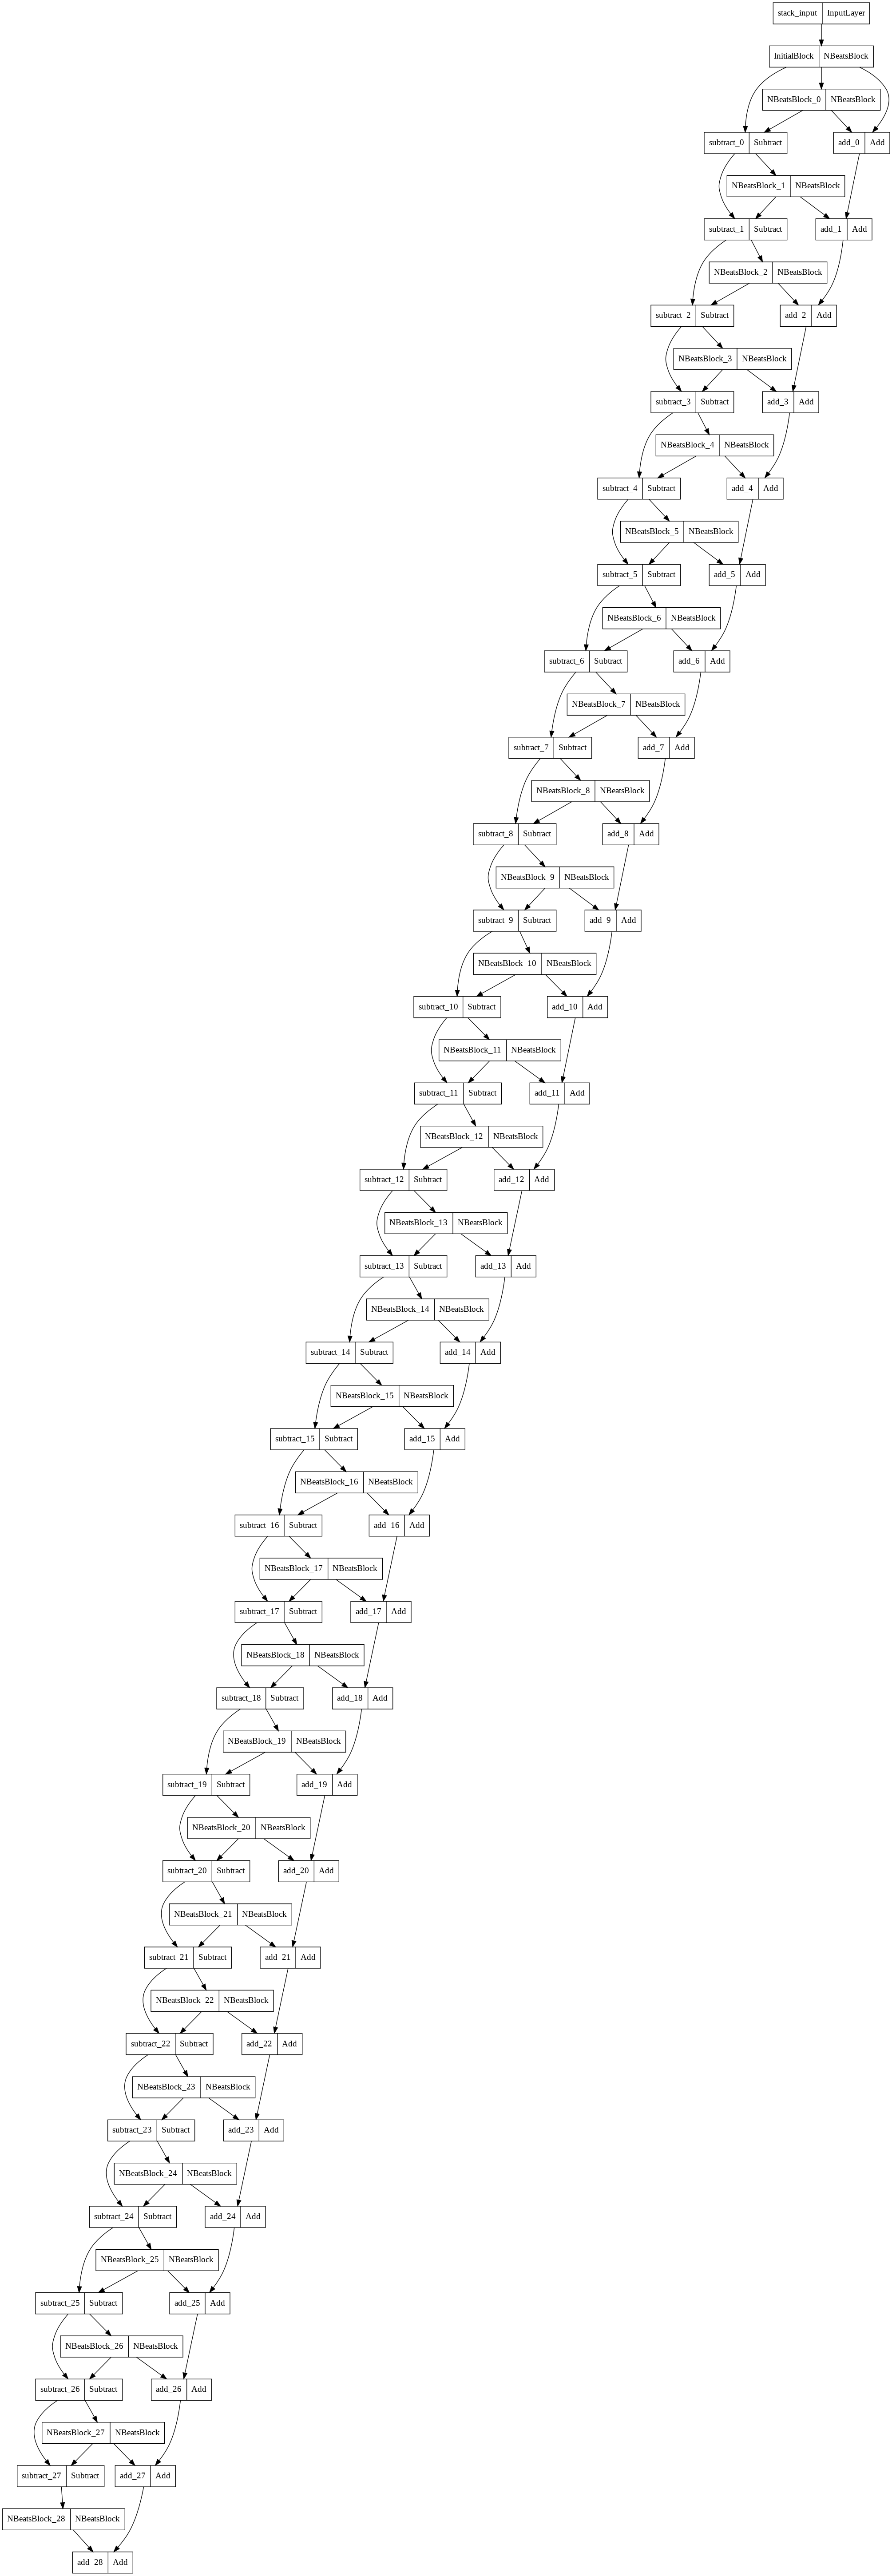

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_7)

## Model 8: an ensambe

In [ ]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=1000,
                        loss_funs=["mae","mse","mape"]):
  ensemble_models = []

  for i in range(num_iter):
    for loss_fun in loss_funs:
      print(f"Optimizing model by reducing:{loss_fun} for {num_epochs} epochs, model number: {i}")

      model = tf.keras.Sequential([
          layers.Dense(128,kernel_initializer="he_normal",activation="relu"),
          layers.Dense(128,kernel_initializer="he_normal",activation="relu"),
          layers.Dense(horizon)
      ])

      model.compile(loss=loss_fun,
                    optimizer="Adam",
                    metrics=["mae","mse"])
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])
      ensemble_models.append(model)

  return ensemble_models
      
  

In [ ]:
%%time
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing:mae for 1000 epochs, model number: 0

Epoch 00788: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00900: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 01000: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing:mse for 1000 epochs, model number: 0

Epoch 00626: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00742: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 00842: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing:mape for 1000 epochs, model number: 0

Epoch 00168: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00268: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing:mae for 1000 epochs, model number: 1

Epoch 00955: ReduceLROnPlateau reducing learning rate to 0.0001000000047497451

In [ ]:
def make_ensemble_preds(ensemble_models, data):

  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [ ]:
ensemble_preds = make_ensemble_preds(ensemble_models,
                                     test_dataset)
ensemble_preds

<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8804.442,  8790.86 ,  9041.447, ..., 50322.973, 49498.055,
        46600.902],
       [ 8766.091,  8743.542,  9055.417, ..., 49391.992, 48511.168,
        45344.51 ],
       [ 8745.423,  8733.032,  9101.387, ..., 49267.17 , 47660.42 ,
        45370.055],
       ...,
       [ 8834.139,  8746.395,  9094.963, ..., 49405.14 , 49501.664,
        46260.992],
       [ 8725.216,  8800.152,  9098.795, ..., 49567.89 , 48514.676,
        45026.184],
       [ 8817.013,  8761.664,  9041.91 , ..., 49738.48 , 48059.734,
        45840.65 ]], dtype=float32)>

In [ ]:
ensemble_results = evaluate_preds(y_test,ensemble_preds)
ensemble_results

{'mae': 578.14655,
 'mape': 2.6480937,
 'mase': 1.0156435,
 'mse': 1178788.6,
 'rmse': 1085.5377}

In [ ]:
ensemble_mean = tf.reduce_mean(ensemble_preds,axis=0)
ensemble_results = evaluate_preds(y_test,ensemble_mean)
ensemble_results

{'mae': 566.2844,
 'mape': 2.5782855,
 'mase': 0.99480486,
 'mse': 1144283.2,
 'rmse': 1069.7118}

In [ ]:
ensemble_median = np.median(ensemble_preds,axis=0)
ensemble_results = evaluate_preds(y_test,ensemble_median)
ensemble_results

{'mae': 567.59796,
 'mape': 2.5800571,
 'mase': 0.9971124,
 'mse': 1147100.5,
 'rmse': 1071.0277}

In [ ]:
def get_upper_lower(preds):

  std = tf.math.reduce_std(preds,axis=0)

  intervals = 1.96 * std

  preds_mean = tf.reduce_mean(preds,axis=0)
  lower, upper = preds_mean - intervals, preds + intervals


  return lower, upper

In [ ]:
lower, upper = get_upper_lower(ensemble_preds)
lower, upper

(<tf.Tensor: shape=(556,), dtype=float32, numpy=
 array([ 8722.555 ,  8725.51  ,  9012.967 ,  8654.287 ,  8685.066 ,
         8654.088 ,  8605.995 ,  8409.7705,  8406.791 ,  8499.864 ,
         8151.341 ,  8061.8687,  8002.8438,  7564.899 ,  7198.8115,
         7211.7476,  6968.3423,  7139.579 ,  7010.652 ,  7460.141 ,
         7307.3496,  7694.545 ,  7484.9707,  7305.4   ,  7263.778 ,
         7264.9995,  7160.364 ,  7363.883 ,  7474.093 ,  7510.9873,
         7489.337 ,  7282.716 ,  7194.412 ,  7154.26  ,  7156.826 ,
         7190.754 ,  7041.2188,  7074.956 ,  6821.895 ,  6549.3477,
         7278.4375,  7081.821 ,  7073.66  ,  7161.4497,  7104.172 ,
         7069.96  ,  7185.5264,  7175.962 ,  7150.876 ,  7181.5493,
         7271.707 ,  7349.446 ,  7201.53  ,  7138.323 ,  7133.245 ,
         6921.515 ,  7233.9507,  7291.5513,  7321.6943,  7617.425 ,
         7979.995 ,  8070.0425,  7790.0703,  8025.622 ,  8017.132 ,
         8133.4746,  8025.2456,  8678.712 ,  8805.141 ,  8688.358 ,

## Model 9: train a model pn the full historical data

In [ ]:
bitcoin_prices_windowed.head()

,Price,block_reward,price+1,price+2,price+3,price+4,price+5,price+6,price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [ ]:
X_all = bitcoin_prices_windowed.dropna().drop(["Price","block_reward"],axis=1).to_numpy()
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()
len(X_all),len(y_all)

(2780, 2780)

In [ ]:
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

dataset_all = tf.data.Dataset.zip((features_dataset_all,labels_dataset_all)).batch(1024).prefetch(tf.data.AUTOTUNE)

dataset_all

<PrefetchDataset shapes: ((None, 7), (None,)), types: (tf.float64, tf.float64)>

In [ ]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    layers.Input(shape=(WINDOW_SIZE)),
    layers.Dense(128,activation="relu"),
    layers.Dense(128,activation="relu"),
    layers.Dense(HORIZON)
])

model_9.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_9.fit(dataset_all,
            epochs=100)

Epoch 1/100
3/3 [==============================] - 0s 5ms/step - loss: 4310.6460
Epoch 2/100
3/3 [==============================] - 0s 4ms/step - loss: 2286.0432
Epoch 3/100
3/3 [==============================] - 0s 4ms/step - loss: 455.6416
Epoch 4/100
3/3 [==============================] - 0s 4ms/step - loss: 1394.4469
Epoch 5/100
3/3 [==============================] - 0s 4ms/step - loss: 1358.7925
Epoch 6/100
3/3 [==============================] - 0s 4ms/step - loss: 600.7654
Epoch 7/100
3/3 [==============================] - 0s 4ms/step - loss: 584.5320
Epoch 8/100
3/3 [==============================] - 0s 4ms/step - loss: 817.2908
Epoch 9/100
3/3 [==============================] - 0s 4ms/step - loss: 534.2358
Epoch 10/100
3/3 [==============================] - 0s 5ms/step - loss: 394.9994
Epoch 11/100
3/3 [==============================] - 0s 4ms/step - loss: 524.4480
Epoch 12/100
3/3 [==============================] - 0s 5ms/step - loss: 370.9251
Epoch 13/100
3/3 [===============

In [ ]:
# Make predictions into future

def make_future_forecasts(values,model,into_future,window_size=WINDOW_SIZE) -> list:
  future_forecast = []
  last_window = values[-WINDOW_SIZE:]

  for _ in range(into_future):
    future_pred = model.predict(tf.expand_dims(last_window,axis=0))
    print(f"Predicting on:\n{last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}")
    future_forecast.append(tf.squeeze(future_pred).numpy())
    last_window = np.append(last_window,future_pred)[-WINDOW_SIZE:]

  return future_forecast

In [ ]:
future_forecast = make_future_forecasts(
    values=y_all,
    model=model_9,
    into_future=14,
    window_size=WINDOW_SIZE
)

Predicting on:
[56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction: 55764.46484375
Predicting on:
[52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 55764.46484375] -> Prediction: 50985.9453125
Predicting on:
[49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 55764.46484375 50985.9453125 ] -> Prediction: 48522.96875
Predicting on:
[50032.69313676 47885.62525472 45604.61575361 43144.47129086
 55764.46484375 50985.9453125  48522.96875   ] -> Prediction: 48137.203125
Predicting on:
[47885.62525472 45604.61575361 43144.47129086 55764.46484375
 50985.9453125  48522.96875    48137.203125  ] -> Prediction: 47880.6328125
Predicting on:
[45604.61575361 43144.47129086 55764.46484375 50985.9453125
 48522.96875    48137.203125   47880.6328125 ] -> Prediction: 46879.71484375
Predicting on:
[43144.47129086 55764.46484375 50985.9453125  48522.96875
 48137.203125   4

In [ ]:
 len(future_forecast)

14

In [ ]:
def get_future_dates(start_date, into_future, offset=1):

  start_date = start_date + np.timedelta64(offset,"D")
  end_date = start_date + np.timedelta64(into_future, "D")

  return np.arange(start_date, end_date, dtype="datetime64[D]")

In [ ]:
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2021-05-18 00:00:00')

In [ ]:
next_time_steps = get_future_dates(last_timestep,14)
next_time_steps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

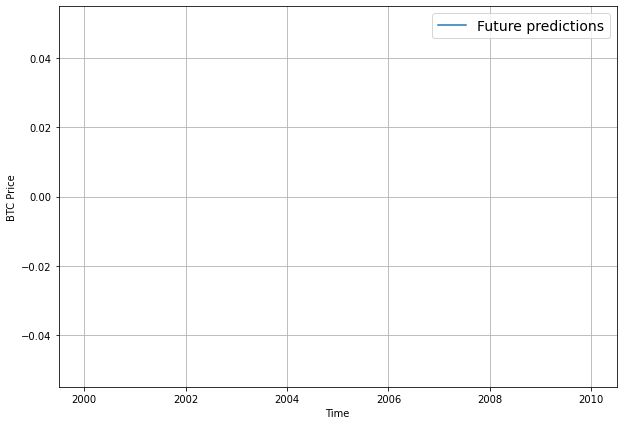

In [ ]:
offset = 450
plt.figure(figsize=(10,7))
# plot_time_series(bitcoin_prices.index,bitcoin_prices["Price"].to_numpy(),format="-",start=offset,label="Actual Data")
plot_time_series(next_time_steps,values=future_forecast,start=offset,format="-",label="Future predictions")

In [ ]:
btc_price_turkey = bitcoin_prices["Price"].to_numpy().copy()
btc_price_turkey[-1] = btc_price_turkey[-1]/100

In [ ]:
btc_price_turkey[-10:]

array([58788.20967893, 58102.19142623, 55715.54665129, 56573.5554719 ,
       52147.82118698, 49764.1320816 , 50032.69313676, 47885.62525472,
       45604.61575361,   431.44471291])

In [ ]:
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey[-10:]

array(['2021-05-09T00:00:00.000000000', '2021-05-10T00:00:00.000000000',
       '2021-05-11T00:00:00.000000000', '2021-05-12T00:00:00.000000000',
       '2021-05-13T00:00:00.000000000', '2021-05-14T00:00:00.000000000',
       '2021-05-15T00:00:00.000000000', '2021-05-16T00:00:00.000000000',
       '2021-05-17T00:00:00.000000000', '2021-05-18T00:00:00.000000000'],
      dtype='datetime64[ns]')

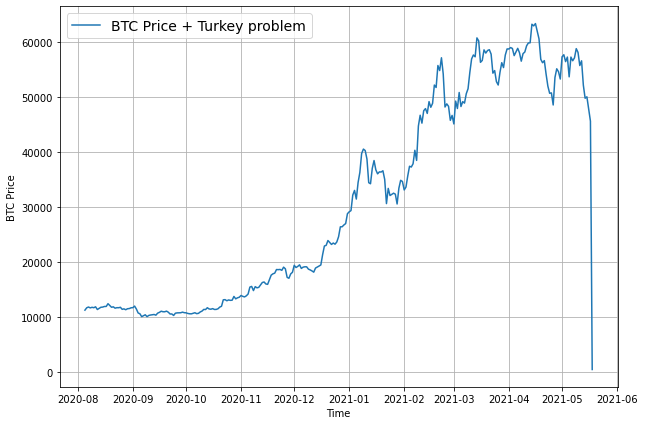

In [ ]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=btc_timesteps_turkey,
                 values=btc_price_turkey,
                 format="-",
                 label="BTC Price + Turkey problem",
                 start=2500
                 )

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
full_windows, full_labels = make_windows(btc_price_turkey,window_size=WINDOW_SIZE,horizon=HORIZON)
X_train,X_test,y_train,y_test = make_train_test_splits(full_windows,full_labels)
len(X_train),len(X_test),len(y_train),len(y_test)

(2224, 556, 2224, 556)

In [ ]:
inputs = layers.Input(shape=(WINDOW_SIZE,),name="input_layer")
x = layers.Dense(128,activation="relu")(inputs)
outputs = layers.Dense(HORIZON)(x)

model_10 = tf.keras.Model(inputs,outputs,name="model_10_dense")

model_10.compile(loss="mae",
                 optimizer="Adam",
                 metrics=["mae","mse"])

#fit the model

model_10.fit(x=X_train,
             y=y_train,
             epochs=1000,
             validation_data=(X_test,y_test),
             batch_size=128,
             callbacks=[create_model_checkpoint(model_10.name)])

Epoch 1/1000
 1/18 [>.............................] - ETA: 5s - loss: 5479.2207 - mae: 5479.2207 - mse: 61689432.0000INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets


18/18 [==============================] - 1s 36ms/step - loss: 3264.5579 - mae: 3264.5579 - mse: 28136800.0000 - val_loss: 8398.2090 - val_mae: 8398.2090 - val_mse: 126067072.0000
Epoch 2/1000
 1/18 [>.............................] - ETA: 0s - loss: 1022.4736 - mae: 1022.4736 - mse: 3282444.5000INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets


18/18 [==============================] - 1s 30ms/step - loss: 517.5216 - mae: 517.5216 - mse: 951543.3750 - val_loss: 1924.0994 - val_mae: 1924.0994 - val_mse: 14149857.0000
Epoch 3/1000
 1/18 [>.............................] - ETA: 0s - loss: 252.5316 - mae: 252.5316 - mse: 192605.6875INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets


18/18 [==============================] - 0s 29ms/step - loss: 224.1158 - mae: 224.1158 - mse: 212207.7969 - val_loss: 1117.4449 - val_mae: 1117.4449 - val_mse: 8284309.0000
Epoch 4/1000
 1/18 [>.............................] - ETA: 0s - loss: 248.1294 - mae: 248.1294 - mse: 302013.1562INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets


18/18 [==============================] - 1s 31ms/step - loss: 187.6569 - mae: 187.6569 - mse: 178369.0625 - val_loss: 1044.0538 - val_mae: 1044.0538 - val_mse: 7714512.0000
Epoch 5/1000
 1/18 [>.............................] - ETA: 0s - loss: 178.1236 - mae: 178.1236 - mse: 109318.3438INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets


18/18 [==============================] - 0s 29ms/step - loss: 173.3017 - mae: 173.3017 - mse: 154451.9688 - val_loss: 1022.8629 - val_mae: 1022.8629 - val_mse: 7555461.0000
Epoch 6/1000
18/18 [==============================] - 0s 4ms/step - loss: 173.0149 - mae: 173.0149 - mse: 155648.5000 - val_loss: 1064.5818 - val_mae: 1064.5818 - val_mse: 7842330.5000
Epoch 7/1000
 1/18 [>.............................] - ETA: 0s - loss: 210.8178 - mae: 210.8178 - mse: 286315.8438INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets


18/18 [==============================] - 1s 29ms/step - loss: 168.5273 - mae: 168.5273 - mse: 149151.5469 - val_loss: 982.6328 - val_mae: 982.6328 - val_mse: 7157598.0000
Epoch 8/1000
 1/18 [>.............................] - ETA: 0s - loss: 143.9294 - mae: 143.9294 - mse: 77990.5078INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets


18/18 [==============================] - 0s 29ms/step - loss: 161.6468 - mae: 161.6468 - mse: 139269.5781 - val_loss: 973.7743 - val_mae: 973.7743 - val_mse: 6975722.5000
Epoch 9/1000
18/18 [==============================] - 0s 4ms/step - loss: 157.7686 - mae: 157.7686 - mse: 135064.6094 - val_loss: 981.7952 - val_mae: 981.7952 - val_mse: 6844490.0000
Epoch 10/1000
 1/18 [>.............................] - ETA: 0s - loss: 169.8050 - mae: 169.8050 - mse: 202450.2656INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets


18/18 [==============================] - 0s 29ms/step - loss: 154.2519 - mae: 154.2519 - mse: 129890.3594 - val_loss: 932.8267 - val_mae: 932.8267 - val_mse: 6701496.0000
Epoch 11/1000
 1/18 [>.............................] - ETA: 0s - loss: 167.0271 - mae: 167.0271 - mse: 122942.0781INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets


18/18 [==============================] - 1s 30ms/step - loss: 150.6967 - mae: 150.6967 - mse: 123388.1719 - val_loss: 908.1465 - val_mae: 908.1465 - val_mse: 6612306.5000
Epoch 12/1000
18/18 [==============================] - 0s 4ms/step - loss: 147.1300 - mae: 147.1300 - mse: 118625.5469 - val_loss: 964.5252 - val_mae: 964.5252 - val_mse: 6483102.5000
Epoch 13/1000
 1/18 [>.............................] - ETA: 0s - loss: 117.6713 - mae: 117.6713 - mse: 89030.3516INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets


18/18 [==============================] - 1s 30ms/step - loss: 146.7295 - mae: 146.7295 - mse: 120088.4609 - val_loss: 887.7365 - val_mae: 887.7365 - val_mse: 6297126.5000
Epoch 14/1000
 1/18 [>.............................] - ETA: 0s - loss: 156.4017 - mae: 156.4017 - mse: 116746.3281INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets


18/18 [==============================] - 1s 29ms/step - loss: 141.2696 - mae: 141.2696 - mse: 110867.7109 - val_loss: 876.8486 - val_mae: 876.8486 - val_mse: 6183171.5000
Epoch 15/1000
18/18 [==============================] - 0s 4ms/step - loss: 141.8145 - mae: 141.8145 - mse: 109804.2500 - val_loss: 954.8094 - val_mae: 954.8094 - val_mse: 6235726.0000
Epoch 16/1000
 1/18 [>.............................] - ETA: 0s - loss: 137.5283 - mae: 137.5283 - mse: 76873.6484INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets


18/18 [==============================] - 1s 30ms/step - loss: 140.7527 - mae: 140.7527 - mse: 108427.4609 - val_loss: 839.0515 - val_mae: 839.0515 - val_mse: 5997523.5000
Epoch 17/1000
 1/18 [>.............................] - ETA: 0s - loss: 129.5454 - mae: 129.5454 - mse: 82235.1875INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets


18/18 [==============================] - 1s 30ms/step - loss: 135.3794 - mae: 135.3794 - mse: 102754.2422 - val_loss: 837.7916 - val_mae: 837.7916 - val_mse: 5905515.5000
Epoch 18/1000
 1/18 [>.............................] - ETA: 0s - loss: 138.8038 - mae: 138.8038 - mse: 91420.5469INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets


18/18 [==============================] - 0s 29ms/step - loss: 133.9184 - mae: 133.9184 - mse: 101002.7578 - val_loss: 828.3622 - val_mae: 828.3622 - val_mse: 5827515.0000
Epoch 19/1000
 1/18 [>.............................] - ETA: 0s - loss: 77.5788 - mae: 77.5788 - mse: 34146.6914INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets


18/18 [==============================] - 1s 29ms/step - loss: 132.6125 - mae: 132.6125 - mse: 98192.5469 - val_loss: 801.6843 - val_mae: 801.6843 - val_mse: 5766127.5000
Epoch 20/1000
18/18 [==============================] - 0s 4ms/step - loss: 134.3899 - mae: 134.3899 - mse: 101535.8984 - val_loss: 889.6539 - val_mae: 889.6539 - val_mse: 6360380.0000
Epoch 21/1000
 1/18 [>.............................] - ETA: 0s - loss: 188.0422 - mae: 188.0422 - mse: 145713.7500INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets


18/18 [==============================] - 0s 29ms/step - loss: 133.2288 - mae: 133.2288 - mse: 98553.3047 - val_loss: 787.1029 - val_mae: 787.1029 - val_mse: 5786916.0000
Epoch 22/1000
 1/18 [>.............................] - ETA: 0s - loss: 175.6925 - mae: 175.6925 - mse: 184745.2812INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets


18/18 [==============================] - 0s 29ms/step - loss: 130.6337 - mae: 130.6337 - mse: 95663.1641 - val_loss: 765.5274 - val_mae: 765.5274 - val_mse: 5588839.5000
Epoch 23/1000
 1/18 [>.............................] - ETA: 0s - loss: 138.7036 - mae: 138.7036 - mse: 85109.0234INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets


18/18 [==============================] - 0s 29ms/step - loss: 125.6604 - mae: 125.6604 - mse: 89944.6953 - val_loss: 759.9706 - val_mae: 759.9706 - val_mse: 5515962.0000
Epoch 24/1000
 1/18 [>.............................] - ETA: 0s - loss: 140.4892 - mae: 140.4892 - mse: 96133.2031INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets


18/18 [==============================] - 1s 30ms/step - loss: 127.2390 - mae: 127.2390 - mse: 91175.0781 - val_loss: 749.7977 - val_mae: 749.7977 - val_mse: 5503295.5000
Epoch 25/1000
18/18 [==============================] - 0s 4ms/step - loss: 124.8115 - mae: 124.8115 - mse: 87671.2422 - val_loss: 750.5328 - val_mae: 750.5328 - val_mse: 5534527.5000
Epoch 26/1000
18/18 [==============================] - 0s 4ms/step - loss: 125.5961 - mae: 125.5961 - mse: 87455.2188 - val_loss: 750.8735 - val_mae: 750.8735 - val_mse: 5532174.5000
Epoch 27/1000
 1/18 [>.............................] - ETA: 0s - loss: 180.2297 - mae: 180.2297 - mse: 157407.2031INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets


18/18 [==============================] - 0s 28ms/step - loss: 124.4427 - mae: 124.4427 - mse: 87387.6953 - val_loss: 735.1691 - val_mae: 735.1691 - val_mse: 5435421.0000
Epoch 28/1000
18/18 [==============================] - 0s 5ms/step - loss: 120.5701 - mae: 120.5701 - mse: 83518.3281 - val_loss: 738.4641 - val_mae: 738.4641 - val_mse: 5327976.5000
Epoch 29/1000
18/18 [==============================] - 0s 4ms/step - loss: 120.1021 - mae: 120.1021 - mse: 83977.5469 - val_loss: 769.0878 - val_mae: 769.0878 - val_mse: 5333134.5000
Epoch 30/1000
18/18 [==============================] - 0s 4ms/step - loss: 124.3754 - mae: 124.3754 - mse: 85688.9531 - val_loss: 850.9017 - val_mae: 850.9017 - val_mse: 5475686.0000
Epoch 31/1000
18/18 [==============================] - 0s 4ms/step - loss: 132.2520 - mae: 132.2520 - mse: 93525.1094 - val_loss: 849.6205 - val_mae: 849.6205 - val_mse: 5460021.5000
Epoch 32/1000
 1/18 [>.............................] - ETA: 0s - loss: 128.4777 - mae: 128.4777 - 

INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets


18/18 [==============================] - 1s 54ms/step - loss: 125.8461 - mae: 125.8461 - mse: 84579.4688 - val_loss: 724.9386 - val_mae: 724.9386 - val_mse: 5271482.0000
Epoch 33/1000
 1/18 [>.............................] - ETA: 0s - loss: 148.3461 - mae: 148.3461 - mse: 149404.5312INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets


18/18 [==============================] - 0s 29ms/step - loss: 119.3719 - mae: 119.3719 - mse: 78714.3906 - val_loss: 709.1807 - val_mae: 709.1807 - val_mse: 5274668.5000
Epoch 34/1000
18/18 [==============================] - 0s 5ms/step - loss: 116.7982 - mae: 116.7982 - mse: 81015.4922 - val_loss: 726.3151 - val_mae: 726.3151 - val_mse: 5224833.5000
Epoch 35/1000
 1/18 [>.............................] - ETA: 0s - loss: 102.6708 - mae: 102.6708 - mse: 47513.6953INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets


18/18 [==============================] - 1s 30ms/step - loss: 116.5065 - mae: 116.5065 - mse: 79930.2812 - val_loss: 704.2858 - val_mae: 704.2858 - val_mse: 5196407.5000
Epoch 36/1000
18/18 [==============================] - 0s 5ms/step - loss: 121.7776 - mae: 121.7776 - mse: 80899.0312 - val_loss: 764.8992 - val_mae: 764.8992 - val_mse: 5228303.0000
Epoch 37/1000
 1/18 [>.............................] - ETA: 0s - loss: 154.4468 - mae: 154.4468 - mse: 134347.8906INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets


18/18 [==============================] - 0s 29ms/step - loss: 118.5978 - mae: 118.5978 - mse: 80440.1875 - val_loss: 698.9585 - val_mae: 698.9585 - val_mse: 5158008.5000
Epoch 38/1000
18/18 [==============================] - 0s 4ms/step - loss: 115.2430 - mae: 115.2430 - mse: 78467.8672 - val_loss: 713.0637 - val_mae: 713.0637 - val_mse: 5305139.5000
Epoch 39/1000
18/18 [==============================] - 0s 4ms/step - loss: 116.9689 - mae: 116.9689 - mse: 78709.7969 - val_loss: 773.0865 - val_mae: 773.0865 - val_mse: 5543285.0000
Epoch 40/1000
 1/18 [>.............................] - ETA: 0s - loss: 117.5173 - mae: 117.5173 - mse: 113750.9219INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets


18/18 [==============================] - 1s 30ms/step - loss: 115.5365 - mae: 115.5365 - mse: 79297.8438 - val_loss: 688.9176 - val_mae: 688.9176 - val_mse: 5166597.5000
Epoch 41/1000
18/18 [==============================] - 0s 4ms/step - loss: 113.4400 - mae: 113.4400 - mse: 77198.5703 - val_loss: 694.4197 - val_mae: 694.4197 - val_mse: 5201235.5000
Epoch 42/1000
 1/18 [>.............................] - ETA: 0s - loss: 105.1828 - mae: 105.1828 - mse: 59536.6406INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets


18/18 [==============================] - 1s 31ms/step - loss: 117.8769 - mae: 117.8769 - mse: 80319.7344 - val_loss: 686.7422 - val_mae: 686.7422 - val_mse: 5150432.5000
Epoch 43/1000
18/18 [==============================] - 0s 4ms/step - loss: 112.4064 - mae: 112.4064 - mse: 75289.8984 - val_loss: 692.0488 - val_mae: 692.0488 - val_mse: 5177038.0000
Epoch 44/1000
18/18 [==============================] - 0s 4ms/step - loss: 113.8805 - mae: 113.8805 - mse: 76147.1719 - val_loss: 696.1211 - val_mae: 696.1211 - val_mse: 5199315.0000
Epoch 45/1000
 1/18 [>.............................] - ETA: 0s - loss: 79.3655 - mae: 79.3655 - mse: 36509.0898INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets


18/18 [==============================] - 1s 30ms/step - loss: 113.1781 - mae: 113.1781 - mse: 76690.2969 - val_loss: 686.4101 - val_mae: 686.4101 - val_mse: 5048756.0000
Epoch 46/1000
 1/18 [>.............................] - ETA: 0s - loss: 85.6765 - mae: 85.6765 - mse: 48324.7461INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets


18/18 [==============================] - 1s 30ms/step - loss: 112.7707 - mae: 112.7707 - mse: 76505.9688 - val_loss: 684.2281 - val_mae: 684.2281 - val_mse: 5034669.0000
Epoch 47/1000
18/18 [==============================] - 0s 4ms/step - loss: 112.7537 - mae: 112.7537 - mse: 76581.8672 - val_loss: 716.7269 - val_mae: 716.7269 - val_mse: 5050994.0000
Epoch 48/1000
18/18 [==============================] - 0s 4ms/step - loss: 113.9181 - mae: 113.9181 - mse: 75373.8359 - val_loss: 757.7383 - val_mae: 757.7383 - val_mse: 5095684.5000
Epoch 49/1000
 1/18 [>.............................] - ETA: 0s - loss: 175.1165 - mae: 175.1165 - mse: 115776.1328INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets


18/18 [==============================] - 0s 29ms/step - loss: 122.1004 - mae: 122.1004 - mse: 79033.2344 - val_loss: 673.7725 - val_mae: 673.7725 - val_mse: 5027562.0000
Epoch 50/1000
18/18 [==============================] - 0s 4ms/step - loss: 111.5910 - mae: 111.5910 - mse: 75563.2188 - val_loss: 696.1976 - val_mae: 696.1976 - val_mse: 5186272.0000
Epoch 51/1000
18/18 [==============================] - 0s 4ms/step - loss: 112.6369 - mae: 112.6369 - mse: 75539.5000 - val_loss: 709.9250 - val_mae: 709.9250 - val_mse: 5027221.5000
Epoch 52/1000
18/18 [==============================] - 0s 4ms/step - loss: 119.8463 - mae: 119.8463 - mse: 80514.1562 - val_loss: 674.1919 - val_mae: 674.1919 - val_mse: 5000278.5000
Epoch 53/1000
 1/18 [>.............................] - ETA: 0s - loss: 66.6820 - mae: 66.6820 - mse: 25087.7852INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets


18/18 [==============================] - 1s 30ms/step - loss: 115.2938 - mae: 115.2938 - mse: 77058.1484 - val_loss: 666.8875 - val_mae: 666.8875 - val_mse: 5015983.0000
Epoch 54/1000
18/18 [==============================] - 0s 4ms/step - loss: 113.2488 - mae: 113.2488 - mse: 75898.8984 - val_loss: 743.7703 - val_mae: 743.7703 - val_mse: 5055802.5000
Epoch 55/1000
18/18 [==============================] - 0s 4ms/step - loss: 114.8249 - mae: 114.8249 - mse: 75632.7109 - val_loss: 675.0957 - val_mae: 675.0957 - val_mse: 5085898.5000
Epoch 56/1000
18/18 [==============================] - 0s 4ms/step - loss: 114.8643 - mae: 114.8643 - mse: 76942.0938 - val_loss: 933.2573 - val_mae: 933.2573 - val_mse: 6103454.5000
Epoch 57/1000
18/18 [==============================] - 0s 4ms/step - loss: 137.2723 - mae: 137.2723 - mse: 94721.7344 - val_loss: 716.5131 - val_mae: 716.5131 - val_mse: 5238668.0000
Epoch 58/1000
18/18 [==============================] - 0s 4ms/step - loss: 118.5546 - mae: 118.554

INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets


18/18 [==============================] - 1s 30ms/step - loss: 111.6305 - mae: 111.6305 - mse: 73393.7812 - val_loss: 666.2142 - val_mae: 666.2142 - val_mse: 5043773.0000
Epoch 60/1000
18/18 [==============================] - 0s 4ms/step - loss: 111.6249 - mae: 111.6249 - mse: 74566.5625 - val_loss: 685.0786 - val_mae: 685.0786 - val_mse: 4975251.5000
Epoch 61/1000
18/18 [==============================] - 0s 4ms/step - loss: 111.1845 - mae: 111.1845 - mse: 74376.2266 - val_loss: 669.0024 - val_mae: 669.0024 - val_mse: 4963474.5000
Epoch 62/1000
 1/18 [>.............................] - ETA: 0s - loss: 73.5100 - mae: 73.5100 - mse: 34854.1797INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets


18/18 [==============================] - 1s 31ms/step - loss: 110.1318 - mae: 110.1318 - mse: 71893.6719 - val_loss: 664.8373 - val_mae: 664.8373 - val_mse: 4966427.0000
Epoch 63/1000
18/18 [==============================] - 0s 4ms/step - loss: 110.9594 - mae: 110.9594 - mse: 73307.0000 - val_loss: 671.8128 - val_mae: 671.8128 - val_mse: 4961106.0000
Epoch 64/1000
18/18 [==============================] - 0s 4ms/step - loss: 111.7119 - mae: 111.7119 - mse: 73915.1797 - val_loss: 701.6686 - val_mae: 701.6686 - val_mse: 4983639.5000
Epoch 65/1000
18/18 [==============================] - 0s 4ms/step - loss: 113.5856 - mae: 113.5856 - mse: 75558.4844 - val_loss: 665.4877 - val_mae: 665.4877 - val_mse: 4951595.0000
Epoch 66/1000
18/18 [==============================] - 0s 4ms/step - loss: 112.5994 - mae: 112.5994 - mse: 73066.7656 - val_loss: 670.0092 - val_mae: 670.0092 - val_mse: 5059836.0000
Epoch 67/1000
18/18 [==============================] - 0s 4ms/step - loss: 108.9659 - mae: 108.965

INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets


18/18 [==============================] - 1s 29ms/step - loss: 108.8671 - mae: 108.8671 - mse: 72108.5078 - val_loss: 658.7565 - val_mae: 658.7565 - val_mse: 5022429.0000
Epoch 73/1000
18/18 [==============================] - 0s 4ms/step - loss: 111.7122 - mae: 111.7122 - mse: 73464.4297 - val_loss: 709.3256 - val_mae: 709.3256 - val_mse: 5219675.0000
Epoch 74/1000
18/18 [==============================] - 0s 4ms/step - loss: 108.6480 - mae: 108.6480 - mse: 72216.0703 - val_loss: 661.3931 - val_mae: 661.3931 - val_mse: 4965088.0000
Epoch 75/1000
18/18 [==============================] - 0s 4ms/step - loss: 109.9907 - mae: 109.9907 - mse: 71028.8906 - val_loss: 700.3789 - val_mae: 700.3789 - val_mse: 4986975.0000
Epoch 76/1000
 1/18 [>.............................] - ETA: 0s - loss: 84.2631 - mae: 84.2631 - mse: 28703.1836INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets


18/18 [==============================] - 1s 30ms/step - loss: 114.2266 - mae: 114.2266 - mse: 74569.1094 - val_loss: 653.8882 - val_mae: 653.8882 - val_mse: 4995604.5000
Epoch 77/1000
17/18 [===========================>..] - ETA: 0s - loss: 113.8174 - mae: 113.8174 - mse: 73940.0781INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets


18/18 [==============================] - 1s 30ms/step - loss: 112.9193 - mae: 112.9193 - mse: 72662.5312 - val_loss: 653.4778 - val_mae: 653.4778 - val_mse: 4994143.0000
Epoch 78/1000
18/18 [==============================] - 0s 4ms/step - loss: 109.3104 - mae: 109.3104 - mse: 70588.2031 - val_loss: 660.4279 - val_mae: 660.4279 - val_mse: 5043717.0000
Epoch 79/1000
18/18 [==============================] - 0s 4ms/step - loss: 110.2197 - mae: 110.2197 - mse: 74083.2734 - val_loss: 682.5385 - val_mae: 682.5385 - val_mse: 5120862.5000
Epoch 80/1000
18/18 [==============================] - 0s 4ms/step - loss: 108.7772 - mae: 108.7772 - mse: 71981.3203 - val_loss: 653.6176 - val_mae: 653.6176 - val_mse: 4969830.0000
Epoch 81/1000
18/18 [==============================] - 0s 4ms/step - loss: 107.2648 - mae: 107.2648 - mse: 70414.5547 - val_loss: 656.3698 - val_mae: 656.3698 - val_mse: 4963743.0000
Epoch 82/1000
 1/18 [>.............................] - ETA: 0s - loss: 194.2658 - mae: 194.2658 - 

INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets


18/18 [==============================] - 1s 29ms/step - loss: 114.1333 - mae: 114.1333 - mse: 75773.8594 - val_loss: 650.2252 - val_mae: 650.2252 - val_mse: 4984057.5000
Epoch 83/1000
18/18 [==============================] - 0s 4ms/step - loss: 111.7255 - mae: 111.7255 - mse: 72956.9453 - val_loss: 758.9776 - val_mae: 758.9776 - val_mse: 5388722.5000
Epoch 84/1000
18/18 [==============================] - 0s 4ms/step - loss: 113.4860 - mae: 113.4860 - mse: 73418.4609 - val_loss: 650.5017 - val_mae: 650.5017 - val_mse: 4988441.5000
Epoch 85/1000
18/18 [==============================] - 0s 4ms/step - loss: 106.9766 - mae: 106.9766 - mse: 70662.4062 - val_loss: 674.1255 - val_mae: 674.1255 - val_mse: 4957495.0000
Epoch 86/1000
18/18 [==============================] - 0s 4ms/step - loss: 111.3647 - mae: 111.3647 - mse: 72266.7500 - val_loss: 719.0687 - val_mae: 719.0687 - val_mse: 5052703.5000
Epoch 87/1000
18/18 [==============================] - 0s 4ms/step - loss: 108.6442 - mae: 108.644

INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets


18/18 [==============================] - 0s 29ms/step - loss: 107.4541 - mae: 107.4541 - mse: 69776.0156 - val_loss: 649.9422 - val_mae: 649.9422 - val_mse: 4941068.0000
Epoch 96/1000
18/18 [==============================] - 0s 4ms/step - loss: 114.0501 - mae: 114.0501 - mse: 73234.8672 - val_loss: 710.4393 - val_mae: 710.4393 - val_mse: 5221920.5000
Epoch 97/1000
18/18 [==============================] - 0s 4ms/step - loss: 111.5233 - mae: 111.5233 - mse: 72553.7266 - val_loss: 678.7257 - val_mae: 678.7257 - val_mse: 5113942.5000
Epoch 98/1000
 1/18 [>.............................] - ETA: 0s - loss: 123.0485 - mae: 123.0485 - mse: 70081.6562INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets


18/18 [==============================] - 1s 30ms/step - loss: 110.0255 - mae: 110.0255 - mse: 70631.5000 - val_loss: 649.9421 - val_mae: 649.9421 - val_mse: 4956292.0000
Epoch 99/1000
 1/18 [>.............................] - ETA: 0s - loss: 151.5881 - mae: 151.5881 - mse: 136102.5625INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets


18/18 [==============================] - 0s 29ms/step - loss: 108.4145 - mae: 108.4145 - mse: 71057.3984 - val_loss: 645.7524 - val_mae: 645.7524 - val_mse: 4946395.0000
Epoch 100/1000
18/18 [==============================] - 0s 4ms/step - loss: 109.7776 - mae: 109.7776 - mse: 69916.6797 - val_loss: 698.1792 - val_mae: 698.1792 - val_mse: 4963488.0000
Epoch 101/1000
18/18 [==============================] - 0s 4ms/step - loss: 114.6099 - mae: 114.6099 - mse: 73180.6875 - val_loss: 667.6305 - val_mae: 667.6305 - val_mse: 5073735.5000
Epoch 102/1000
18/18 [==============================] - 0s 4ms/step - loss: 109.7910 - mae: 109.7910 - mse: 71922.8203 - val_loss: 660.8949 - val_mae: 660.8949 - val_mse: 5054585.5000
Epoch 103/1000
18/18 [==============================] - 0s 4ms/step - loss: 109.8123 - mae: 109.8123 - mse: 69045.6719 - val_loss: 749.1041 - val_mae: 749.1041 - val_mse: 5041330.5000
Epoch 104/1000
18/18 [==============================] - 0s 4ms/step - loss: 111.2349 - mae: 11

INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets


18/18 [==============================] - 1s 30ms/step - loss: 111.9189 - mae: 111.9189 - mse: 72105.9062 - val_loss: 644.8521 - val_mae: 644.8521 - val_mse: 4966023.0000
Epoch 111/1000
 1/18 [>.............................] - ETA: 0s - loss: 99.9935 - mae: 99.9935 - mse: 71017.3516INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets


18/18 [==============================] - 0s 29ms/step - loss: 107.0071 - mae: 107.0071 - mse: 70125.3203 - val_loss: 644.6618 - val_mae: 644.6618 - val_mse: 4969121.0000
Epoch 112/1000
18/18 [==============================] - 0s 5ms/step - loss: 110.0519 - mae: 110.0519 - mse: 71737.6328 - val_loss: 716.9833 - val_mae: 716.9833 - val_mse: 4979786.5000
Epoch 113/1000
 1/18 [>.............................] - ETA: 0s - loss: 98.1653 - mae: 98.1653 - mse: 44393.0508INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets


18/18 [==============================] - 1s 30ms/step - loss: 110.1526 - mae: 110.1526 - mse: 71390.5781 - val_loss: 643.6412 - val_mae: 643.6412 - val_mse: 4949711.0000
Epoch 114/1000
18/18 [==============================] - 0s 4ms/step - loss: 107.0309 - mae: 107.0309 - mse: 70768.2812 - val_loss: 681.3669 - val_mae: 681.3669 - val_mse: 5110979.0000
Epoch 115/1000
18/18 [==============================] - 0s 4ms/step - loss: 110.0253 - mae: 110.0253 - mse: 73048.6719 - val_loss: 764.9272 - val_mae: 764.9272 - val_mse: 5052669.0000
Epoch 116/1000
18/18 [==============================] - 0s 4ms/step - loss: 116.6115 - mae: 116.6115 - mse: 75762.0156 - val_loss: 656.3423 - val_mae: 656.3423 - val_mse: 4916631.5000
Epoch 117/1000
18/18 [==============================] - 0s 4ms/step - loss: 105.7688 - mae: 105.7688 - mse: 69719.4766 - val_loss: 664.0518 - val_mae: 664.0518 - val_mse: 4930342.0000
Epoch 118/1000
18/18 [==============================] - 0s 4ms/step - loss: 106.6264 - mae: 10

INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets


18/18 [==============================] - 0s 29ms/step - loss: 105.5866 - mae: 105.5866 - mse: 68797.9844 - val_loss: 642.2443 - val_mae: 642.2443 - val_mse: 4933516.5000
Epoch 128/1000
18/18 [==============================] - 0s 4ms/step - loss: 105.9153 - mae: 105.9153 - mse: 69577.7266 - val_loss: 643.7597 - val_mae: 643.7597 - val_mse: 4955228.0000
Epoch 129/1000
18/18 [==============================] - 0s 4ms/step - loss: 106.2253 - mae: 106.2253 - mse: 69750.4297 - val_loss: 658.9000 - val_mae: 658.9000 - val_mse: 5024802.5000
Epoch 130/1000
18/18 [==============================] - 0s 4ms/step - loss: 114.4102 - mae: 114.4102 - mse: 69633.2266 - val_loss: 675.8149 - val_mae: 675.8149 - val_mse: 5067441.5000
Epoch 131/1000
 1/18 [>.............................] - ETA: 0s - loss: 108.4578 - mae: 108.4578 - mse: 69916.6406INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets


18/18 [==============================] - 1s 30ms/step - loss: 107.7470 - mae: 107.7470 - mse: 68693.5078 - val_loss: 641.0735 - val_mae: 641.0735 - val_mse: 4930912.0000
Epoch 132/1000
 1/18 [>.............................] - ETA: 0s - loss: 62.2949 - mae: 62.2949 - mse: 14450.9893INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets


18/18 [==============================] - 1s 29ms/step - loss: 106.6283 - mae: 106.6283 - mse: 68065.3828 - val_loss: 640.7634 - val_mae: 640.7634 - val_mse: 4923015.5000
Epoch 133/1000
18/18 [==============================] - 0s 5ms/step - loss: 105.4898 - mae: 105.4898 - mse: 68805.8281 - val_loss: 642.0225 - val_mae: 642.0225 - val_mse: 4935909.5000
Epoch 134/1000
18/18 [==============================] - 0s 4ms/step - loss: 105.2979 - mae: 105.2979 - mse: 68266.5156 - val_loss: 642.3981 - val_mae: 642.3980 - val_mse: 4915513.0000
Epoch 135/1000
 1/18 [>.............................] - ETA: 0s - loss: 119.7767 - mae: 119.7767 - mse: 98011.0547INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets


18/18 [==============================] - 1s 30ms/step - loss: 107.0915 - mae: 107.0915 - mse: 68196.7812 - val_loss: 640.4566 - val_mae: 640.4566 - val_mse: 4919189.5000
Epoch 136/1000
18/18 [==============================] - 0s 4ms/step - loss: 105.2530 - mae: 105.2530 - mse: 68373.1641 - val_loss: 641.9350 - val_mae: 641.9350 - val_mse: 4941920.5000
Epoch 137/1000
18/18 [==============================] - 0s 4ms/step - loss: 105.7533 - mae: 105.7533 - mse: 69175.7031 - val_loss: 673.6567 - val_mae: 673.6567 - val_mse: 4906848.5000
Epoch 138/1000
18/18 [==============================] - 0s 5ms/step - loss: 108.5862 - mae: 108.5862 - mse: 71228.5312 - val_loss: 681.0845 - val_mae: 681.0845 - val_mse: 5089692.5000
Epoch 139/1000
18/18 [==============================] - 0s 4ms/step - loss: 109.8744 - mae: 109.8744 - mse: 71241.2109 - val_loss: 642.6995 - val_mae: 642.6995 - val_mse: 4945198.0000
Epoch 140/1000
18/18 [==============================] - 0s 4ms/step - loss: 110.8732 - mae: 11

INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets


18/18 [==============================] - 1s 30ms/step - loss: 107.8950 - mae: 107.8950 - mse: 68309.8203 - val_loss: 640.1458 - val_mae: 640.1458 - val_mse: 4914848.5000
Epoch 146/1000
18/18 [==============================] - 0s 4ms/step - loss: 109.0893 - mae: 109.0893 - mse: 69120.5000 - val_loss: 743.7692 - val_mae: 743.7692 - val_mse: 4996431.0000
Epoch 147/1000
18/18 [==============================] - 0s 5ms/step - loss: 118.3506 - mae: 118.3506 - mse: 73032.1484 - val_loss: 914.4620 - val_mae: 914.4620 - val_mse: 5392014.0000
Epoch 148/1000
18/18 [==============================] - 0s 4ms/step - loss: 129.6913 - mae: 129.6913 - mse: 82799.0703 - val_loss: 733.7999 - val_mae: 733.7999 - val_mse: 5007009.0000
Epoch 149/1000
18/18 [==============================] - 0s 4ms/step - loss: 115.5686 - mae: 115.5686 - mse: 74494.7422 - val_loss: 655.0015 - val_mae: 655.0015 - val_mse: 4944938.0000
Epoch 150/1000
18/18 [==============================] - 0s 4ms/step - loss: 107.4677 - mae: 10

In [ ]:
model_10 = tf.keras.models.load_model()
model_10.evaluate(X_test,y_test)

18/18 [==============================] - 0s 2ms/step - loss: 683.7066 - mae: 683.7066 - mse: 4840934.0000


[683.7066040039062, 683.7066040039062, 4840934.0]

In [ ]:
model_10_preds = make_preds(model_10,X_test)
model_10_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8718.285, 8677.727, 8943.637, 8641.03 , 8653.282, 8647.975,
       8555.952, 8411.028, 8367.341, 8426.522], dtype=float32)>

In [ ]:
model_10_results = evaluate_preds(tf.squeeze(y_test),model_10_preds)
model_10_results

{'mae': 683.70654,
 'mape': 21.4867,
 'mase': 1.0580381,
 'mse': 4840934.0,
 'rmse': 2200.2122}

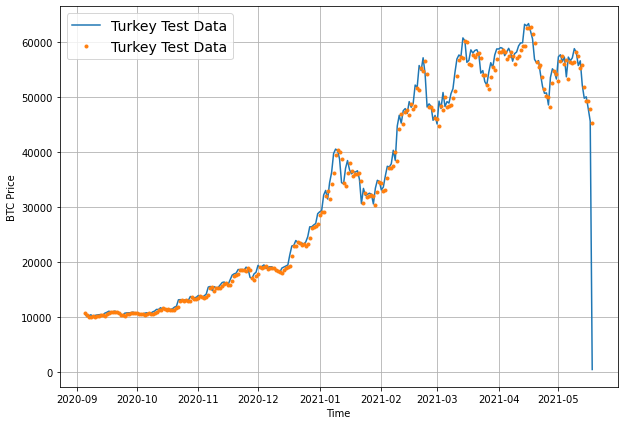

In [ ]:
plt.figure(figsize=(10,7))
offset=300
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=btc_price_turkey[-len(y_test):],
                 format="-",
                 label="Turkey Test Data",
                 start=offset)
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=model_10_preds,
                 label="Turkey Test Data",
                 start=offset)